In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install catboost

In [3]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import plot_tree,plot_importance,XGBRegressor,XGBRFRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from lightgbm.sklearn import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_red= pd.read_csv('df_red.csv')
df_green= pd.read_csv('df_green.csv')
df_yellow= pd.read_csv('df_yellow.csv')

In [5]:
df_red

,week_end_dt,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,...,china_total_price_shift_5_Rolling_6,china_total_price_shift_5_Rolling_7,china_total_price_shift_6_Rolling_2,china_total_price_shift_6_Rolling_4,china_total_price_shift_6_Rolling_6,china_total_price_shift_6_Rolling_7,china_total_price_shift_7_Rolling_2,china_total_price_shift_7_Rolling_4,china_total_price_shift_7_Rolling_6,china_total_price_shift_7_Rolling_7
0,2016-02-21,6.924475,1798854.9,93660.2,25153.1,1680041.5,0.0,0.0,0,0,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
1,2016-02-28,6.825035,2178384.1,211996.1,42386.6,1924001.4,0.0,0.0,0,0,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
2,2016-03-06,6.649885,2364682.6,303703.3,28653.3,2032325.8,0.0,0.0,0,0,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
3,2016-03-13,6.649885,2208782.3,264377.9,0.0,1944404.3,0.0,0.0,0,0,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
4,2016-03-20,6.649885,2647120.3,453094.5,0.0,2194025.8,0.0,0.0,0,0,...,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,2023-09-03,6.984959,2250074.0,118628.5,4300.7,1629389.8,482332.7,15422.1,0,0,...,484014.293333,436398.921429,618920.385,522681.5550,405612.335000,388525.247143,208487.040,331490.5875,293778.626667,266905.207143
394,2023-09-10,6.785139,2183336.1,82404.5,0.0,1692231.9,377855.4,23133.1,0,0,...,533923.093333,485111.380000,789061.705,498774.3725,484014.293333,436398.921429,618920.385,522681.5550,405612.335000,388525.247143
395,2023-09-17,6.735184,2416993.0,45361.3,0.0,2016678.1,312769.5,42184.0,0,0,...,536848.995000,562548.734286,556406.170,587663.2775,533923.093333,485111.380000,789061.705,498774.3725,484014.293333,436398.921429
396,2023-09-24,7.334644,2761128.0,8695.6,29937.0,2530027.4,180220.8,12246.9,0,0,...,564303.621667,503137.144286,612998.240,701029.9725,536848.995000,562548.734286,556406.170,587663.2775,533923.093333,485111.380000


In [6]:
df_red.set_index('week_end_dt', inplace= True)
df_green.set_index('week_end_dt', inplace= True)
df_yellow.set_index('week_end_dt', inplace= True)

In [7]:
len(df_red)

398

In [8]:
red_train=df_red[:-16]
red_test= df_red[-16:]
n_train =len(red_train)
forecast_horizon= 4

In [9]:
models_names=["DecisionTreeRegressor","RandomForestRegressor","SVR()","LinearRegression","XGBRegressor_boo",
                    "XGBRFRegressor_boo","AdaBoostRegressor_boo","LGBMRegressor_boo","CatBoostRegressor_boo"]

models=[DecisionTreeRegressor(random_state=0),RandomForestRegressor(random_state=0),SVR(),LinearRegression(),XGBRegressor(random_state=0),
                XGBRFRegressor(random_state=0),AdaBoostRegressor(random_state=0),LGBMRegressor(force_row_wise=True),CatBoostRegressor()]


In [10]:
red_selected_features_12= ['price_shift_4_Rolling_2',
 'india_season_shift_4_Rolling_7',
 'jordan_min_price_shift_4_Rolling_2',
 'price_shift_4_Rolling_4',
 'demand_shift_4_Rolling_2',
 'vietnam',
 'jordan_max_price_shift_4_Rolling_2',
 'price_shift_5_Rolling_2',
 'vietnam_season_3_shift_4_Rolling_2',
 'jordan_min_price_shift_4_Rolling_4',
 'vietnam_season_2',
 'price_shift_4_Rolling_6',
 'price']

green_selected_features_12= ['price_shift_4_Rolling_2',
 'india_season_shift_6_Rolling_6',
 'price_shift_4_Rolling_4',
 'vietnam',
 'price_shift_5_Rolling_2',
 'vietnam_season_3_shift_5_Rolling_2',
 'jordan_min_price_shift_4_Rolling_2',
 'brazil_season_shift_4_Rolling_7',
 'price_shift_4_Rolling_6',
 'vietnam_season_2_shift_4_Rolling_2',
 'jordan_max_price_shift_4_Rolling_2',
 'vietnam_season_2',
 'price']

yellow_selected_features_12= ['price_shift_4_Rolling_2',
 'india_shift_4_Rolling_6',
 'jordan_min_price_shift_4_Rolling_2',
 'jordan_max_price_shift_4_Rolling_2',
 'price_shift_4_Rolling_4',
 'vietnam',
 'price_shift_5_Rolling_2',
 'india_season_shift_5_Rolling_7',
 'jordan_min_price_shift_4_Rolling_4',
 'jordan_max_price_shift_4_Rolling_4',
 'price_shift_4_Rolling_6',
 'brazil',
 'price']

In [11]:
df_red_12feat=df_red[red_selected_features_12]
df_green_12feat=df_green[green_selected_features_12]
df_yellow_12feat=df_yellow[yellow_selected_features_12]

In [12]:

mae_results_red = {}
row= {}
model_data_red = []


for i in range(n_train, len(df_red_12feat) - forecast_horizon + 1):
  # Split the data into the training set and test set for each window
  train_data = df_red_12feat[i - n_train:i]
  test_data = df_red_12feat[i:i + forecast_horizon]

  X_train= train_data.drop('price', axis= 1)
  y_train= train_data['price']

  X_test= test_data.drop('price', axis= 1)
  y_test= test_data['price']

  for model in models:
    model.fit(X_train, y_train)
    y_pred_red = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred_red)
    model_name = model.__class__.__name__  # Get the model's name as the key
    if model_name not in mae_results_red:
        mae_results_red[model_name] = []


    mae_results_red[model_name].append(mae)
    row= {}
    row['window'] = i - n_train
    row['week_end_dt'] = y_test.index.values
    row["model_name"] = model_name
    row["mae"] = mae
    row["y_test"] =  y_test.values
    row["y_pred_red"] = y_pred_red


    model_data_red.append(row)


 # Display the MAE results for each model
for model_name, mae_list in mae_results_red.items():
    print(f'Model: {model_name}')
    for i, mae in enumerate(mae_list):
       print(f'Window {i+1}: MAE = {mae:.4f}')

model_data_red


Streaming output truncated to the last 5000 lines.
542:	learn: 0.2305166	total: 1.4s	remaining: 1.18s
543:	learn: 0.2302607	total: 1.4s	remaining: 1.17s
544:	learn: 0.2298074	total: 1.4s	remaining: 1.17s
545:	learn: 0.2296350	total: 1.41s	remaining: 1.17s
546:	learn: 0.2288934	total: 1.41s	remaining: 1.17s
547:	learn: 0.2285432	total: 1.41s	remaining: 1.16s
548:	learn: 0.2284067	total: 1.41s	remaining: 1.16s
549:	learn: 0.2283119	total: 1.42s	remaining: 1.16s
550:	learn: 0.2279503	total: 1.42s	remaining: 1.16s
551:	learn: 0.2276230	total: 1.42s	remaining: 1.15s
552:	learn: 0.2268413	total: 1.42s	remaining: 1.15s
553:	learn: 0.2266414	total: 1.43s	remaining: 1.15s
554:	learn: 0.2263330	total: 1.43s	remaining: 1.15s
555:	learn: 0.2258932	total: 1.43s	remaining: 1.14s
556:	learn: 0.2253241	total: 1.43s	remaining: 1.14s
557:	learn: 0.2251417	total: 1.44s	remaining: 1.14s
558:	learn: 0.2249513	total: 1.44s	remaining: 1.13s
559:	learn: 0.2248598	total: 1.44s	remaining: 1.13s
560:	learn: 0.22

[{'window': 0,
  'week_end_dt': array(['2023-06-18', '2023-06-25', '2023-07-02', '2023-07-09'],
        dtype=object),
  'model_name': 'DecisionTreeRegressor',
  'mae': 0.9697724999999995,
  'y_test': array([8.10373 , 9.21348 , 9.133865, 8.82748 ]),
  'y_pred_red': array([7.99992 , 7.200195, 8.099675, 8.099675])},
 {'window': 0,
  'week_end_dt': array(['2023-06-18', '2023-06-25', '2023-07-02', '2023-07-09'],
        dtype=object),
  'model_name': 'RandomForestRegressor',
  'mae': 1.0194536124999976,
  'y_test': array([8.10373 , 9.21348 , 9.133865, 8.82748 ]),
  'y_pred_red': array([7.69657645, 7.94963675, 7.6971785 , 7.85734885])},
 {'window': 0,
  'week_end_dt': array(['2023-06-18', '2023-06-25', '2023-07-02', '2023-07-09'],
        dtype=object),
  'model_name': 'SVR',
  'mae': 0.7812249881947086,
  'y_test': array([8.10373 , 9.21348 , 9.133865, 8.82748 ]),
  'y_pred_red': array([8.01378429, 8.29280919, 7.72219364, 8.12486793])},
 {'window': 0,
  'week_end_dt': array(['2023-06-18', '

In [13]:

mae_results_green = {}
row= {}
model_data_green = []


for i in range(n_train, len(df_green_12feat) - forecast_horizon + 1):
  # Split the data into the training set and test set for each window
  train_data = df_green_12feat[i - n_train:i]
  test_data = df_green_12feat[i:i + forecast_horizon]

  X_train= train_data.drop('price', axis= 1)
  y_train= train_data['price']

  X_test= test_data.drop('price', axis= 1)
  y_test= test_data['price']

  for model in models:
    model.fit(X_train, y_train)
    y_pred_green = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred_green)
    model_name = model.__class__.__name__  # Get the model's name as the key
    if model_name not in mae_results_green:
        mae_results_green[model_name] = []


    mae_results_green[model_name].append(mae)
    row= {}
    row['window'] = i - n_train
    row['week_end_dt'] = y_test.index.values
    row["model_name"] = model_name
    row["mae"] = mae
    row["y_test"] =  y_test.values
    row["y_pred_green"] = y_pred_green


    model_data_green.append(row)


 # Display the MAE results for each model
for model_name, mae_list in mae_results_green.items():
    print(f'Model: {model_name}')
    for i, mae in enumerate(mae_list):
       print(f'Window {i+1}: MAE = {mae:.4f}')

model_data_green


Streaming output truncated to the last 5000 lines.
542:	learn: 0.1942913	total: 1.22s	remaining: 1.03s
543:	learn: 0.1939535	total: 1.23s	remaining: 1.03s
544:	learn: 0.1938686	total: 1.23s	remaining: 1.03s
545:	learn: 0.1933774	total: 1.23s	remaining: 1.02s
546:	learn: 0.1929839	total: 1.23s	remaining: 1.02s
547:	learn: 0.1928135	total: 1.24s	remaining: 1.02s
548:	learn: 0.1924721	total: 1.24s	remaining: 1.02s
549:	learn: 0.1924038	total: 1.25s	remaining: 1.02s
550:	learn: 0.1923091	total: 1.25s	remaining: 1.02s
551:	learn: 0.1921062	total: 1.26s	remaining: 1.02s
552:	learn: 0.1917831	total: 1.26s	remaining: 1.02s
553:	learn: 0.1913450	total: 1.26s	remaining: 1.01s
554:	learn: 0.1910795	total: 1.26s	remaining: 1.01s
555:	learn: 0.1908125	total: 1.27s	remaining: 1.01s
556:	learn: 0.1904030	total: 1.27s	remaining: 1.01s
557:	learn: 0.1900616	total: 1.27s	remaining: 1s
558:	learn: 0.1894910	total: 1.27s	remaining: 1s
559:	learn: 0.1893994	total: 1.27s	remaining: 1s
560:	learn: 0.1892954	

[{'window': 0,
  'week_end_dt': array(['2023-06-18', '2023-06-25', '2023-07-02', '2023-07-09'],
        dtype=object),
  'model_name': 'DecisionTreeRegressor',
  'mae': 1.1002224999999999,
  'y_test': array([7.744155, 7.840655, 8.00953 , 7.96128 ]),
  'y_pred_green': array([6.77504, 6.84962, 6.75503, 6.77504])},
 {'window': 0,
  'week_end_dt': array(['2023-06-18', '2023-06-25', '2023-07-02', '2023-07-09'],
        dtype=object),
  'model_name': 'RandomForestRegressor',
  'mae': 0.9743257000000032,
  'y_test': array([7.744155, 7.840655, 8.00953 , 7.96128 ]),
  'y_pred_green': array([6.8244518 , 7.1066865 , 6.87612885, 6.85105005])},
 {'window': 0,
  'week_end_dt': array(['2023-06-18', '2023-06-25', '2023-07-02', '2023-07-09'],
        dtype=object),
  'model_name': 'SVR',
  'mae': 0.604126423021917,
  'y_test': array([7.744155, 7.840655, 8.00953 , 7.96128 ]),
  'y_pred_green': array([7.26442613, 7.4681018 , 7.0620384 , 7.34454797])},
 {'window': 0,
  'week_end_dt': array(['2023-06-18', 

In [14]:

mae_results_yellow = {}
row= {}
model_data_yellow = []


for i in range(n_train, len(df_yellow_12feat) - forecast_horizon + 1):
  # Split the data into the training set and test set for each window
  train_data = df_yellow_12feat[i - n_train:i]
  test_data = df_yellow_12feat[i:i + forecast_horizon]

  X_train= train_data.drop('price', axis= 1)
  y_train= train_data['price']

  X_test= test_data.drop('price', axis= 1)
  y_test= test_data['price']

  for model in models:
    model.fit(X_train, y_train)
    y_pred_yellow = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred_yellow)
    model_name = model.__class__.__name__  # Get the model's name as the key
    if model_name not in mae_results_yellow:
        mae_results_yellow[model_name] = []


    mae_results_yellow[model_name].append(mae)
    row= {}
    row['window'] = i - n_train
    row['week_end_dt'] = y_test.index.values
    row["model_name"] = model_name
    row["mae"] = mae
    row["y_test"] =  y_test.values
    row["y_pred_yellow"] = y_pred_yellow


    model_data_yellow.append(row)


 # Display the MAE results for each model
for model_name, mae_list in mae_results_yellow.items():
    print(f'Model: {model_name}')
    for i, mae in enumerate(mae_list):
       print(f'Window {i+1}: MAE = {mae:.4f}')

model_data_yellow


Streaming output truncated to the last 5000 lines.
542:	learn: 0.3021062	total: 1.69s	remaining: 1.42s
543:	learn: 0.3016298	total: 1.69s	remaining: 1.42s
544:	learn: 0.3008383	total: 1.69s	remaining: 1.41s
545:	learn: 0.3003915	total: 1.69s	remaining: 1.41s
546:	learn: 0.2998227	total: 1.7s	remaining: 1.4s
547:	learn: 0.2994722	total: 1.7s	remaining: 1.4s
548:	learn: 0.2991611	total: 1.7s	remaining: 1.4s
549:	learn: 0.2984856	total: 1.7s	remaining: 1.39s
550:	learn: 0.2983244	total: 1.71s	remaining: 1.39s
551:	learn: 0.2978011	total: 1.71s	remaining: 1.39s
552:	learn: 0.2974582	total: 1.71s	remaining: 1.38s
553:	learn: 0.2966837	total: 1.72s	remaining: 1.38s
554:	learn: 0.2956968	total: 1.72s	remaining: 1.38s
555:	learn: 0.2950749	total: 1.72s	remaining: 1.37s
556:	learn: 0.2949612	total: 1.72s	remaining: 1.37s
557:	learn: 0.2942159	total: 1.73s	remaining: 1.37s
558:	learn: 0.2937041	total: 1.73s	remaining: 1.36s
559:	learn: 0.2932222	total: 1.73s	remaining: 1.36s
560:	learn: 0.292595

[{'window': 0,
  'week_end_dt': array(['2023-06-18', '2023-06-25', '2023-07-02', '2023-07-09'],
        dtype=object),
  'model_name': 'DecisionTreeRegressor',
  'mae': 1.881755,
  'y_test': array([ 8.91978, 10.56028, 10.46378, 10.75328]),
  'y_pred_yellow': array([8.785395, 8.785395, 7.799655, 7.799655])},
 {'window': 0,
  'week_end_dt': array(['2023-06-18', '2023-06-25', '2023-07-02', '2023-07-09'],
        dtype=object),
  'model_name': 'RandomForestRegressor',
  'mae': 1.750417425000002,
  'y_test': array([ 8.91978, 10.56028, 10.46378, 10.75328]),
  'y_pred_yellow': array([8.5398431 , 8.53737005, 8.1782025 , 8.44003465])},
 {'window': 0,
  'week_end_dt': array(['2023-06-18', '2023-06-25', '2023-07-02', '2023-07-09'],
        dtype=object),
  'model_name': 'SVR',
  'mae': 1.0848751748235022,
  'y_test': array([ 8.91978, 10.56028, 10.46378, 10.75328]),
  'y_pred_yellow': array([9.18674585, 9.47131181, 8.94152655, 9.2919668 ])},
 {'window': 0,
  'week_end_dt': array(['2023-06-18', '20

In [15]:
model_data_red= pd.DataFrame(model_data_red)
model_data_green= pd.DataFrame(model_data_green)
model_data_yellow= pd.DataFrame(model_data_yellow)

In [16]:
models_names

['DecisionTreeRegressor',
 'RandomForestRegressor',
 'SVR()',
 'LinearRegression',
 'XGBRegressor_boo',
 'XGBRFRegressor_boo',
 'AdaBoostRegressor_boo',
 'LGBMRegressor_boo',
 'CatBoostRegressor_boo']

try each model and show the results

##1) DecisionTreeRegressor

In [17]:
DecisionTreeRegressor_model_red=model_data_red[model_data_red['model_name']== 'DecisionTreeRegressor']
DecisionTreeRegressor_model_red = DecisionTreeRegressor_model_red.explode(['week_end_dt','y_test', 'y_pred_red'])
DecisionTreeRegressor_model_red['week_end_dt']= pd.to_datetime(DecisionTreeRegressor_model_red['week_end_dt'])

DecisionTreeRegressor_model_red
DecisionTreeRegressor_model_red['mae'].mean()

0.6905155639423076

In [18]:
DecisionTreeRegressor_model_green=model_data_green[model_data_green['model_name']== 'DecisionTreeRegressor']
DecisionTreeRegressor_model_green = DecisionTreeRegressor_model_green.explode(['week_end_dt','y_test', 'y_pred_green'])
DecisionTreeRegressor_model_green['week_end_dt']= pd.to_datetime(DecisionTreeRegressor_model_green['week_end_dt'])

DecisionTreeRegressor_model_green
DecisionTreeRegressor_model_green['mae'].mean()

0.6364667692307695

In [19]:
DecisionTreeRegressor_model_yellow=model_data_yellow[model_data_yellow['model_name']== 'DecisionTreeRegressor']
DecisionTreeRegressor_model_yellow = DecisionTreeRegressor_model_yellow.explode(['week_end_dt','y_test', 'y_pred_yellow'])
DecisionTreeRegressor_model_yellow['week_end_dt']= pd.to_datetime(DecisionTreeRegressor_model_yellow['week_end_dt'])

DecisionTreeRegressor_model_yellow
DecisionTreeRegressor_model_yellow['mae'].mean()

1.4097315875000005

In [20]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_DecisionTreeRegressor_red= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(DecisionTreeRegressor_model_red[DecisionTreeRegressor_model_red['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_red':'mean'}))
 df_DecisionTreeRegressor_red=pd.concat([df_DecisionTreeRegressor_red, df], axis=0)

df_DecisionTreeRegressor_red.reset_index(inplace=True)


In [21]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_DecisionTreeRegressor_green= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(DecisionTreeRegressor_model_green[DecisionTreeRegressor_model_green['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_green':'mean'}))
 df_DecisionTreeRegressor_green=pd.concat([df_DecisionTreeRegressor_green, df], axis=0)

df_DecisionTreeRegressor_green.reset_index(inplace=True)


In [22]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_DecisionTreeRegressor_yellow= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(DecisionTreeRegressor_model_yellow[DecisionTreeRegressor_model_yellow['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_yellow':'mean'}))
 df_DecisionTreeRegressor_yellow=pd.concat([df_DecisionTreeRegressor_yellow, df], axis=0)

df_DecisionTreeRegressor_yellow.reset_index(inplace=True)


In [23]:
outcome_red=df_DecisionTreeRegressor_red['y_pred_red']
outcome_green=df_DecisionTreeRegressor_green['y_pred_green']
outcome_yellow=df_DecisionTreeRegressor_yellow['y_pred_yellow']

In [24]:
new_date_index=pd.date_range(start="2023-06-18",end="2023-10-01",freq="W")
new_date_index=pd.DataFrame({"date":new_date_index})

outcome_red_all=pd.concat([outcome_red,new_date_index],axis=1)
outcome_red_all['date']= pd.to_datetime(outcome_red_all['date'])
outcome_red_all.set_index('date', inplace= True)

outcome_green_all=pd.concat([outcome_green,new_date_index],axis=1)
outcome_green_all['date']= pd.to_datetime(outcome_green_all['date'])
outcome_green_all.set_index('date', inplace= True)

outcome_yellow_all=pd.concat([outcome_yellow,new_date_index],axis=1)
outcome_yellow_all['date']= pd.to_datetime(outcome_yellow_all['date'])
outcome_yellow_all.set_index('date', inplace= True)

In [25]:
actual_df_red=df_red_12feat['price'][-50:]
actual_df_red.reset_index()
actual_df_red.index=pd.to_datetime(actual_df_red.index)

actual_df_green=df_green_12feat['price'][-50:]
actual_df_green.reset_index()
actual_df_green.index=pd.to_datetime(actual_df_green.index)

actual_df_yellow=df_yellow_12feat['price'][-50:]
actual_df_yellow.reset_index()
actual_df_yellow.index=pd.to_datetime(actual_df_yellow.index)

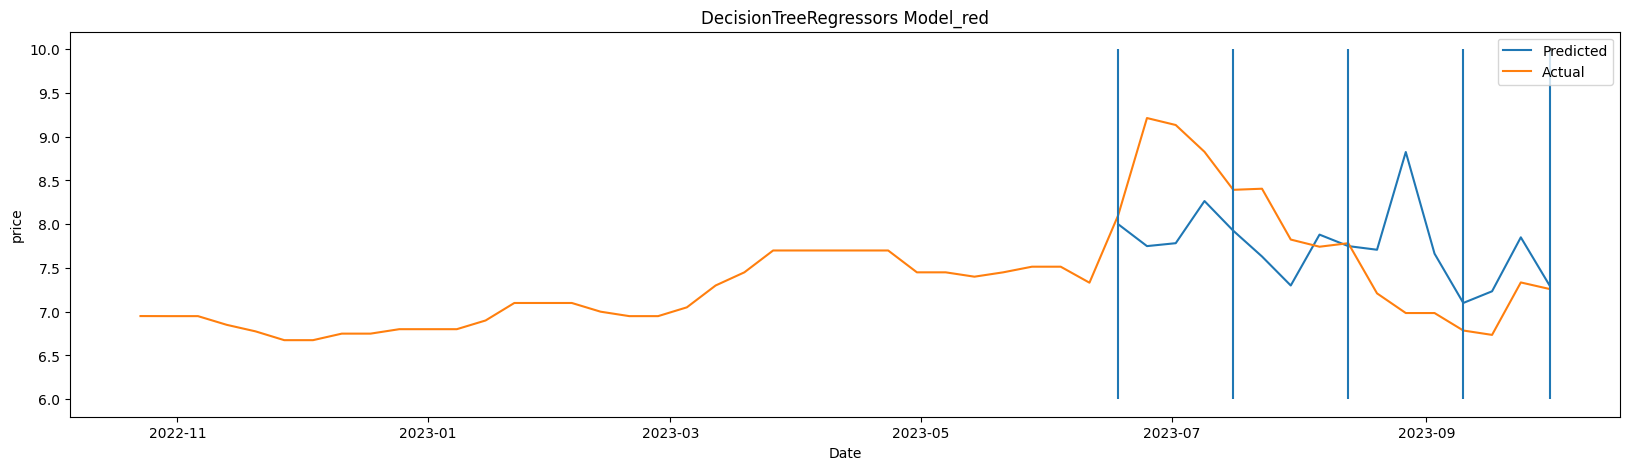

In [26]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=10

# Plot the first DataFrame
plt.plot(outcome_red_all.index, outcome_red_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_red.index, actual_df_red, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('DecisionTreeRegressors Model_red')
plt.legend()

# Show the plot
plt.show()

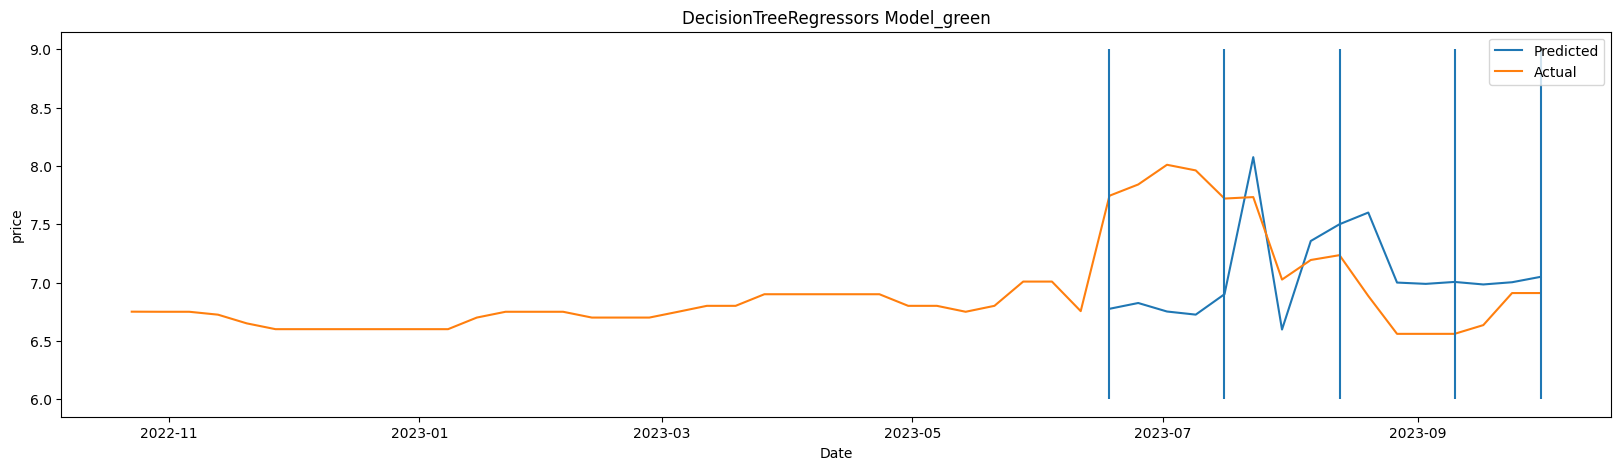

In [27]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=9

# Plot the first DataFrame
plt.plot(outcome_green_all.index, outcome_green_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_green.index, actual_df_green, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('DecisionTreeRegressors Model_green')
plt.legend()

# Show the plot
plt.show()

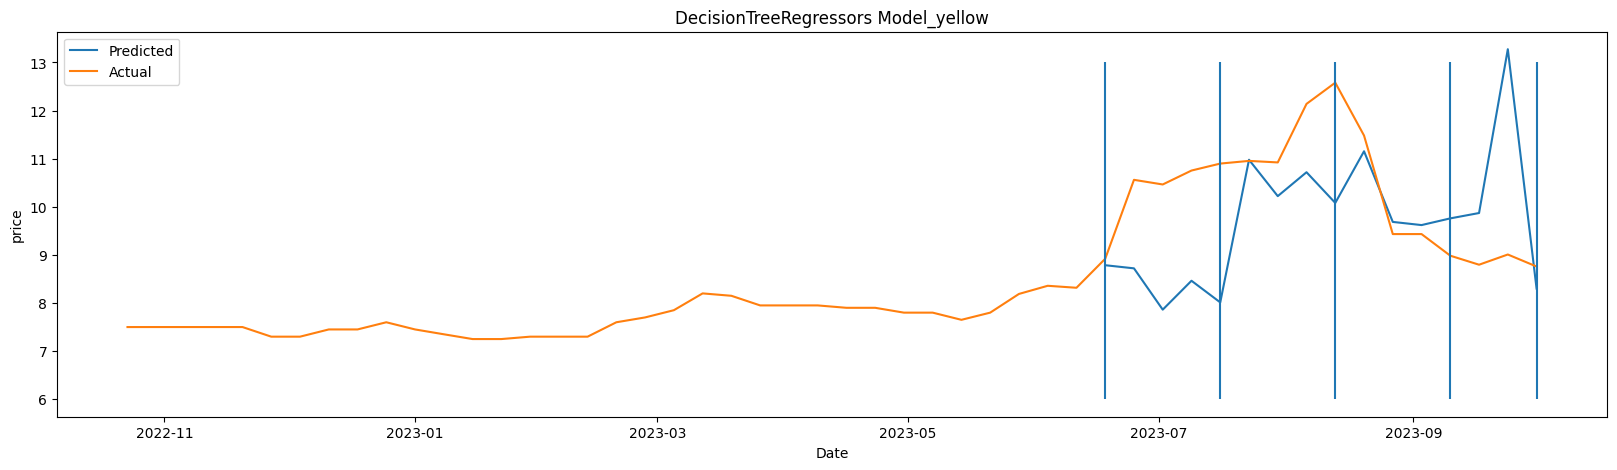

In [28]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=13

# Plot the first DataFrame
plt.plot(outcome_yellow_all.index, outcome_yellow_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_yellow.index, actual_df_yellow, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('DecisionTreeRegressors Model_yellow')
plt.legend()

# Show the plot
plt.show()

##2) RandomForestRegressor

In [29]:
RandomForestRegressort_model_red=model_data_red[model_data_red['model_name']== 'RandomForestRegressor']
RandomForestRegressort_model_red = RandomForestRegressort_model_red.explode(['week_end_dt','y_test', 'y_pred_red'])
RandomForestRegressort_model_red['week_end_dt']= pd.to_datetime(RandomForestRegressort_model_red['week_end_dt'])

RandomForestRegressort_model_red
RandomForestRegressort_model_red['mae'].mean()

0.6986847182740371

In [30]:
RandomForestRegressort_model_green=model_data_green[model_data_green['model_name']== 'RandomForestRegressor']
RandomForestRegressort_model_green = RandomForestRegressort_model_green.explode(['week_end_dt','y_test', 'y_pred_green'])
RandomForestRegressort_model_green['week_end_dt']= pd.to_datetime(RandomForestRegressort_model_green['week_end_dt'])

RandomForestRegressort_model_green
RandomForestRegressort_model_green['mae'].mean()

0.5202188011346165

In [31]:
RandomForestRegressort_model_yellow=model_data_yellow[model_data_yellow['model_name']== 'RandomForestRegressor']
RandomForestRegressort_model_yellow = RandomForestRegressort_model_yellow.explode(['week_end_dt','y_test', 'y_pred_yellow'])
RandomForestRegressort_model_yellow['week_end_dt']= pd.to_datetime(RandomForestRegressort_model_yellow['week_end_dt'])

RandomForestRegressort_model_yellow
RandomForestRegressort_model_yellow['mae'].mean()

1.334843298413462

In [32]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_RandomForestRegressort_red= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(RandomForestRegressort_model_red[RandomForestRegressort_model_red['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_red':'mean'}))
 df_RandomForestRegressort_red=pd.concat([df_RandomForestRegressort_red, df], axis=0)

df_RandomForestRegressort_red.reset_index(inplace=True)


In [33]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_RandomForestRegressort_green= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(RandomForestRegressort_model_green[RandomForestRegressort_model_green['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_green':'mean'}))
 df_RandomForestRegressort_green=pd.concat([df_RandomForestRegressort_green, df], axis=0)

df_RandomForestRegressort_green.reset_index(inplace=True)

In [34]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_RandomForestRegressort_yellow= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(RandomForestRegressort_model_yellow[RandomForestRegressort_model_yellow['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_yellow':'mean'}))
 df_RandomForestRegressort_yellow=pd.concat([df_RandomForestRegressort_yellow, df], axis=0)

df_RandomForestRegressort_yellow.reset_index(inplace=True)

In [35]:
outcome_red=df_RandomForestRegressort_red['y_pred_red']
outcome_green=df_RandomForestRegressort_green['y_pred_green']
outcome_yellow=df_RandomForestRegressort_yellow['y_pred_yellow']

In [36]:
new_date_index=pd.date_range(start="2023-06-18",end="2023-10-01",freq="W")
new_date_index=pd.DataFrame({"date":new_date_index})

outcome_red_all=pd.concat([outcome_red,new_date_index],axis=1)
outcome_red_all['date']= pd.to_datetime(outcome_red_all['date'])
outcome_red_all.set_index('date', inplace= True)

outcome_green_all=pd.concat([outcome_green,new_date_index],axis=1)
outcome_green_all['date']= pd.to_datetime(outcome_green_all['date'])
outcome_green_all.set_index('date', inplace= True)

outcome_yellow_all=pd.concat([outcome_yellow,new_date_index],axis=1)
outcome_yellow_all['date']= pd.to_datetime(outcome_yellow_all['date'])
outcome_yellow_all.set_index('date', inplace= True)

In [37]:
actual_df_red=df_red_12feat['price'][-50:]
actual_df_red.reset_index()
actual_df_red.index=pd.to_datetime(actual_df_red.index)

actual_df_green=df_green_12feat['price'][-50:]
actual_df_green.reset_index()
actual_df_green.index=pd.to_datetime(actual_df_green.index)

actual_df_yellow=df_yellow_12feat['price'][-50:]
actual_df_yellow.reset_index()
actual_df_yellow.index=pd.to_datetime(actual_df_yellow.index)

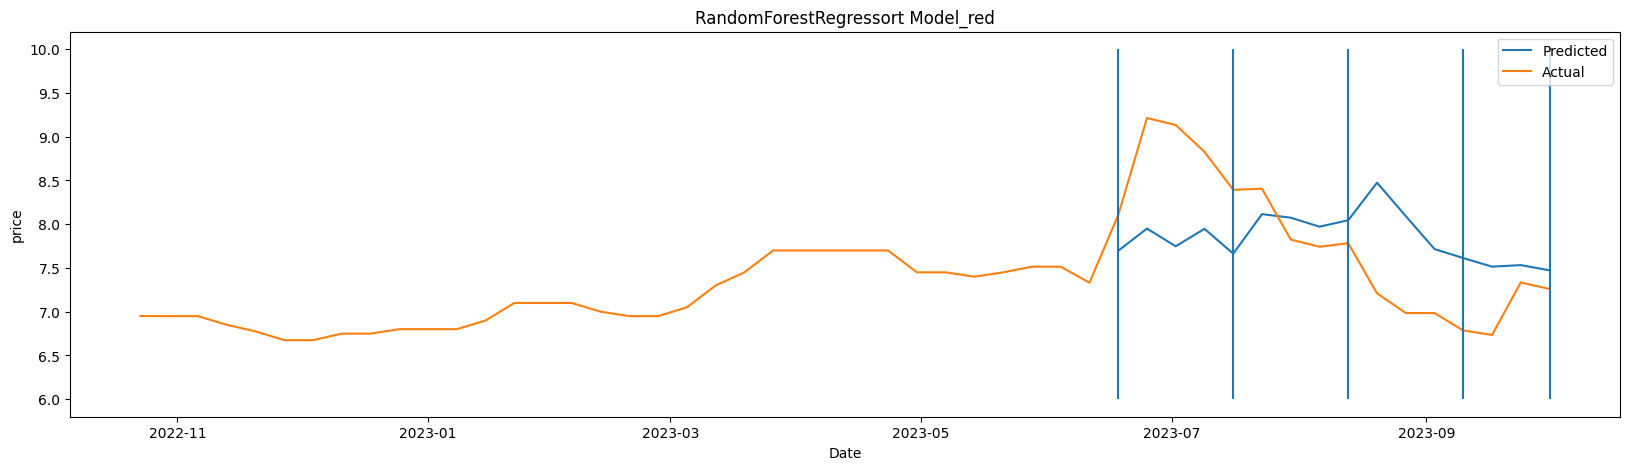

In [38]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=10

# Plot the first DataFrame
plt.plot(outcome_red_all.index, outcome_red_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_red.index, actual_df_red, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('RandomForestRegressort Model_red')
plt.legend()

# Show the plot
plt.show()

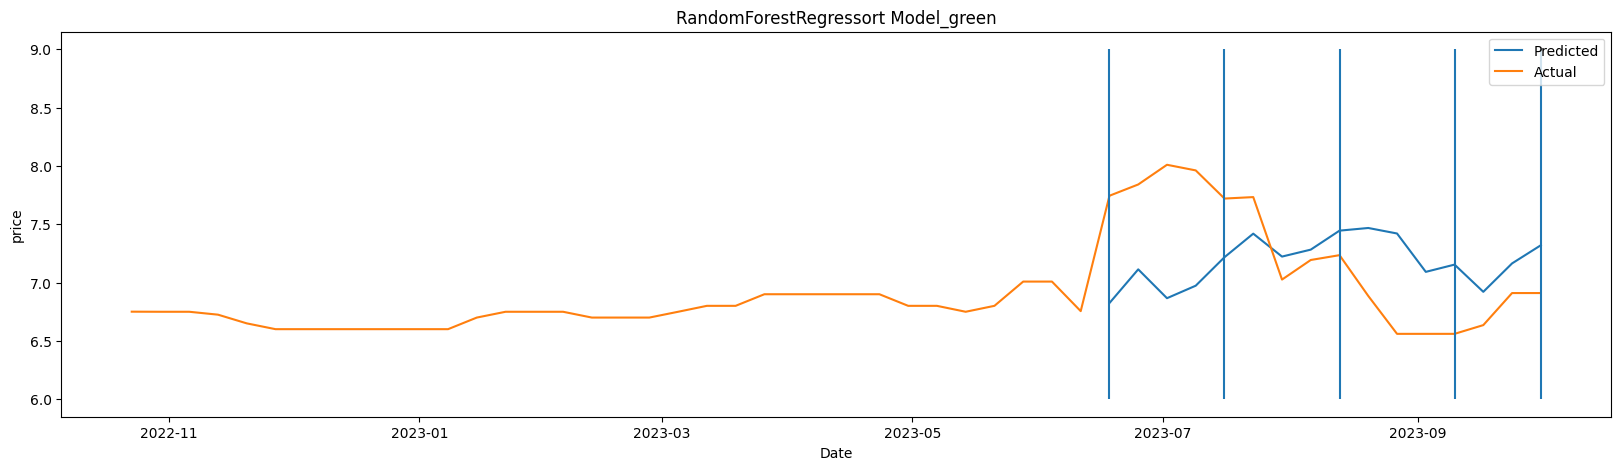

In [39]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=9

# Plot the first DataFrame
plt.plot(outcome_green_all.index, outcome_green_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_green.index, actual_df_green, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('RandomForestRegressort Model_green')
plt.legend()

# Show the plot
plt.show()

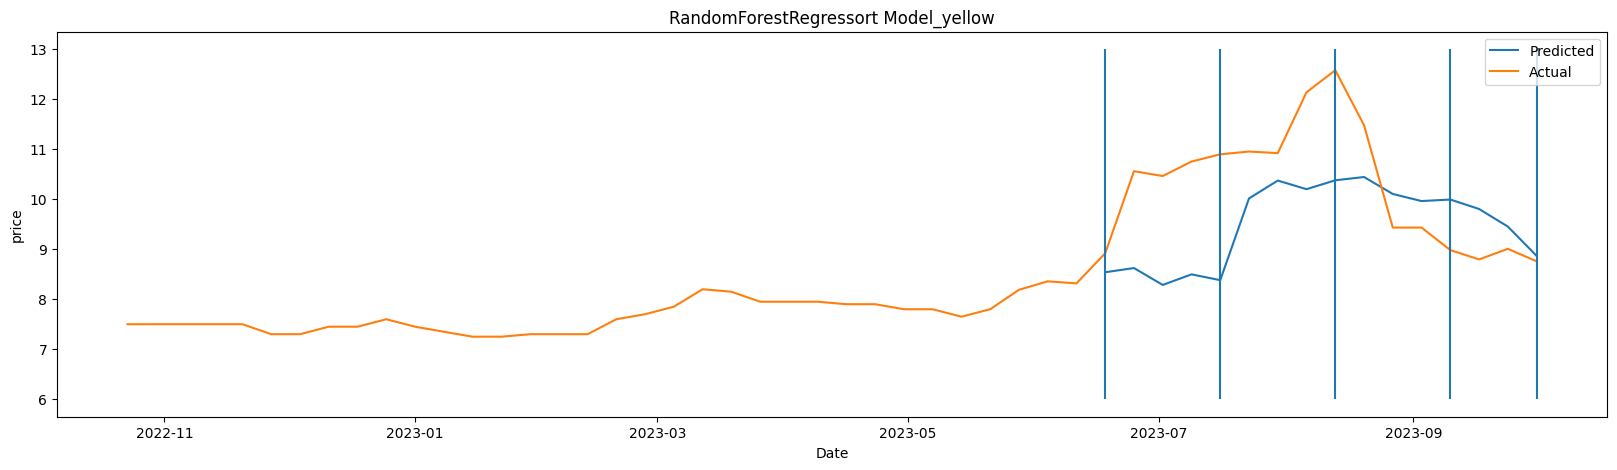

In [40]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=13

# Plot the first DataFrame
plt.plot(outcome_yellow_all.index, outcome_yellow_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_yellow.index, actual_df_yellow, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('RandomForestRegressort Model_yellow')
plt.legend()

# Show the plot
plt.show()

##3) SVR

In [41]:
SVR_model_red=model_data_red[model_data_red['model_name']== 'SVR']
SVR_model_red = SVR_model_red.explode(['week_end_dt','y_test', 'y_pred_red'])
SVR_model_red['week_end_dt']= pd.to_datetime(SVR_model_red['week_end_dt'])

SVR_model_red
SVR_model_red['mae'].mean()

0.6105996330420873

In [42]:
SVR_model_green=model_data_green[model_data_green['model_name']== 'SVR']
SVR_model_green = SVR_model_green.explode(['week_end_dt','y_test', 'y_pred_green'])
SVR_model_green['week_end_dt']= pd.to_datetime(SVR_model_green['week_end_dt'])

SVR_model_green
SVR_model_green['mae'].mean()

0.4351740551167579

In [43]:
SVR_model_yellow=model_data_yellow[model_data_yellow['model_name']== 'SVR']
SVR_model_yellow = SVR_model_yellow.explode(['week_end_dt','y_test', 'y_pred_yellow'])
SVR_model_yellow['week_end_dt']= pd.to_datetime(SVR_model_yellow['week_end_dt'])

SVR_model_yellow
SVR_model_yellow['mae'].mean()

1.6186789513335913

In [44]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_SVR_red= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(SVR_model_red[SVR_model_red['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_red':'mean'}))
 df_SVR_red=pd.concat([df_SVR_red, df], axis=0)

df_SVR_red.reset_index(inplace=True)


In [45]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_SVR_green= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(SVR_model_green[SVR_model_green['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_green':'mean'}))
 df_SVR_green=pd.concat([df_SVR_green, df], axis=0)

df_SVR_green.reset_index(inplace=True)

In [46]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_SVR_yellow= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(SVR_model_yellow[SVR_model_yellow['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_yellow':'mean'}))
 df_SVR_yellow=pd.concat([df_SVR_yellow, df], axis=0)

df_SVR_yellow.reset_index(inplace=True)

In [47]:
outcome_red=df_SVR_red['y_pred_red']
outcome_green=df_SVR_green['y_pred_green']
outcome_yellow=df_SVR_yellow['y_pred_yellow']

In [48]:
new_date_index=pd.date_range(start="2023-06-18",end="2023-10-01",freq="W")
new_date_index=pd.DataFrame({"date":new_date_index})

outcome_red_all=pd.concat([outcome_red,new_date_index],axis=1)
outcome_red_all['date']= pd.to_datetime(outcome_red_all['date'])
outcome_red_all.set_index('date', inplace= True)

outcome_green_all=pd.concat([outcome_green,new_date_index],axis=1)
outcome_green_all['date']= pd.to_datetime(outcome_green_all['date'])
outcome_green_all.set_index('date', inplace= True)

outcome_yellow_all=pd.concat([outcome_yellow,new_date_index],axis=1)
outcome_yellow_all['date']= pd.to_datetime(outcome_yellow_all['date'])
outcome_yellow_all.set_index('date', inplace= True)

In [49]:
actual_df_red=df_red_12feat['price'][-50:]
actual_df_red.reset_index()
actual_df_red.index=pd.to_datetime(actual_df_red.index)

actual_df_green=df_green_12feat['price'][-50:]
actual_df_green.reset_index()
actual_df_green.index=pd.to_datetime(actual_df_green.index)

actual_df_yellow=df_yellow_12feat['price'][-50:]
actual_df_yellow.reset_index()
actual_df_yellow.index=pd.to_datetime(actual_df_yellow.index)

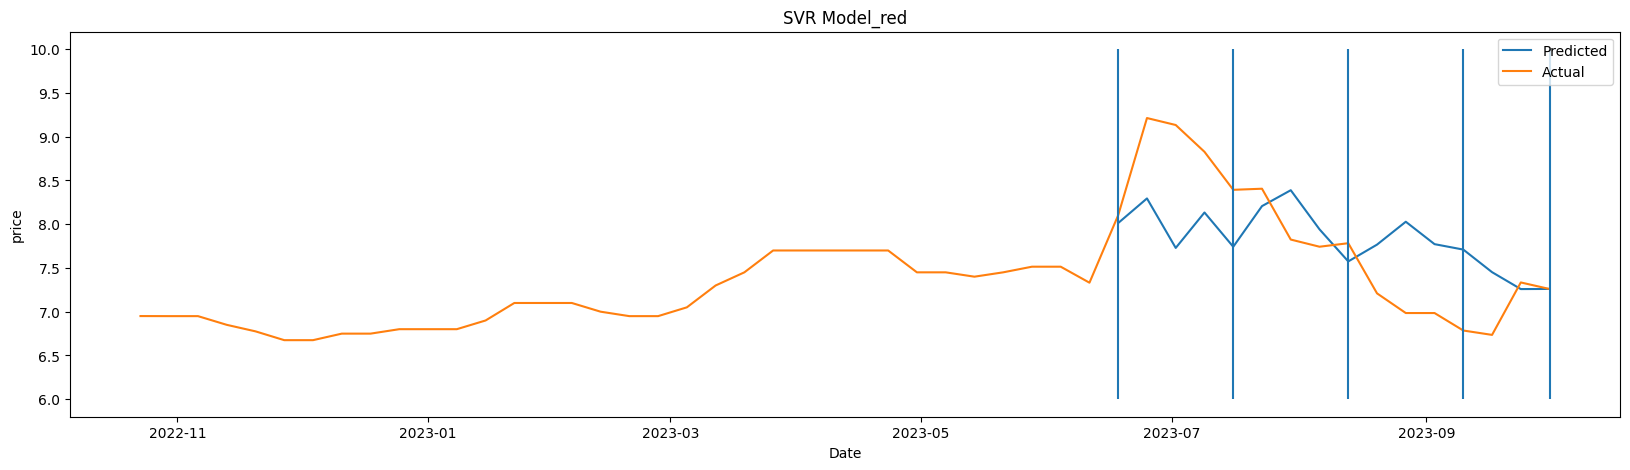

In [50]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=10

# Plot the first DataFrame
plt.plot(outcome_red_all.index, outcome_red_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_red.index, actual_df_red, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('SVR Model_red')
plt.legend()

# Show the plot
plt.show()

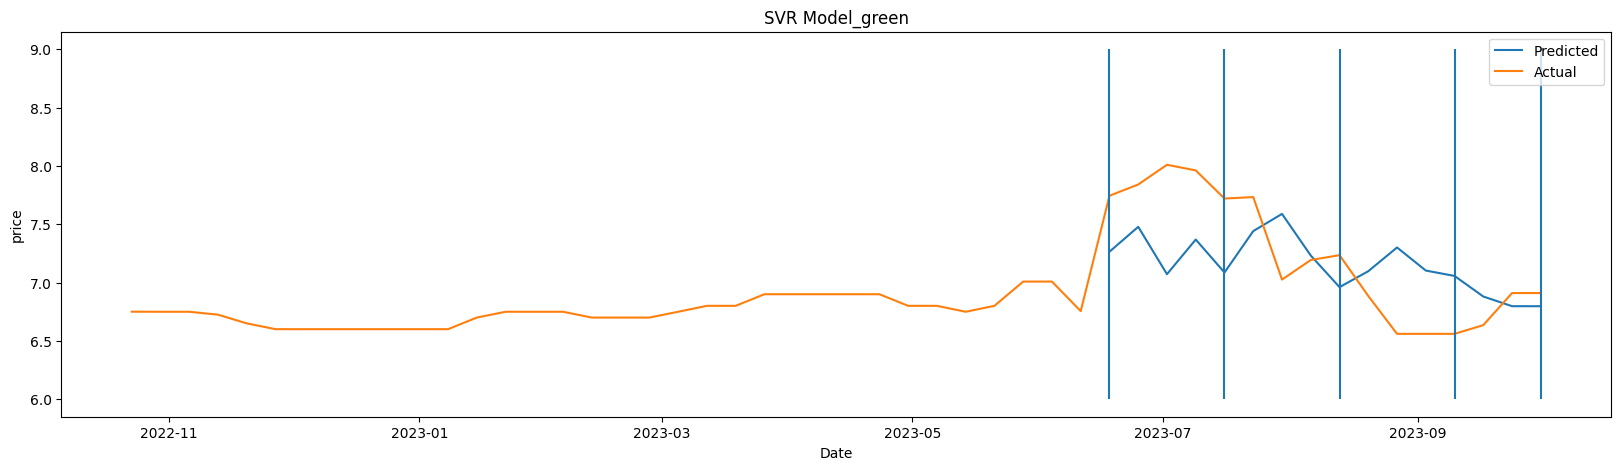

In [51]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=9

# Plot the first DataFrame
plt.plot(outcome_green_all.index, outcome_green_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_green.index, actual_df_green, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('SVR Model_green')
plt.legend()

# Show the plot
plt.show()

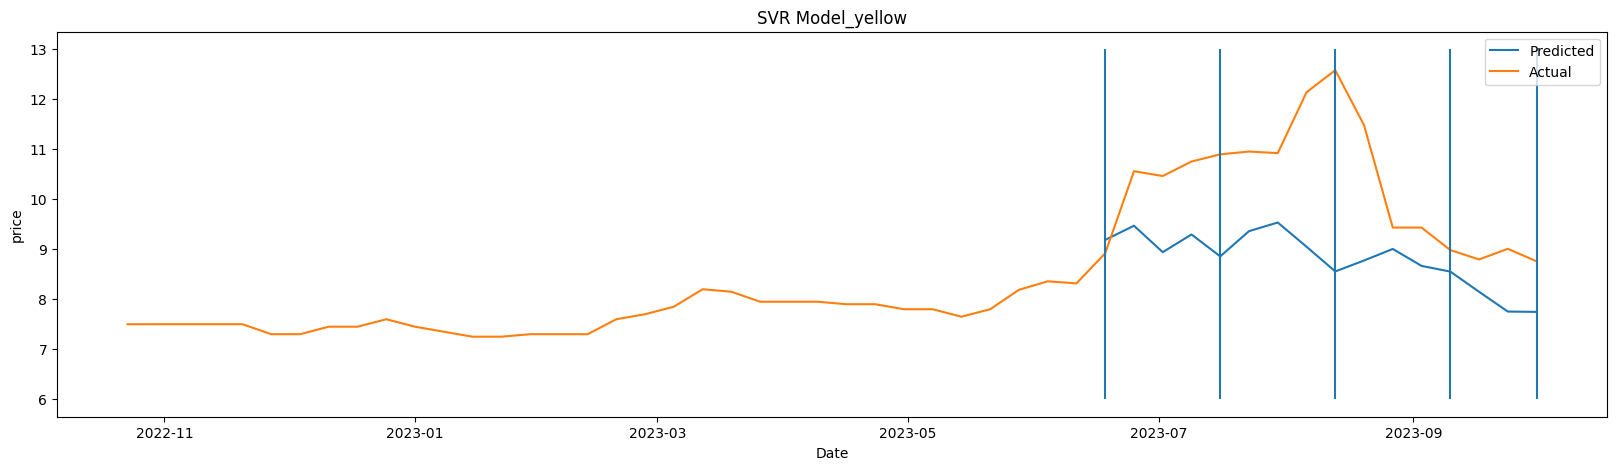

In [52]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=13

# Plot the first DataFrame
plt.plot(outcome_yellow_all.index, outcome_yellow_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_yellow.index, actual_df_yellow, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('SVR Model_yellow')
plt.legend()

# Show the plot
plt.show()

##4) LinearRegression

In [53]:
LinearRegression_model_red=model_data_red[model_data_red['model_name']== 'LinearRegression']
LinearRegression_model_red = LinearRegression_model_red.explode(['week_end_dt','y_test', 'y_pred_red'])
LinearRegression_model_red['week_end_dt']= pd.to_datetime(LinearRegression_model_red['week_end_dt'])

LinearRegression_model_red
LinearRegression_model_red['mae'].mean()

0.6716314210022086

In [54]:
LinearRegression_model_green=model_data_green[model_data_green['model_name']== 'LinearRegression']
LinearRegression_model_green= LinearRegression_model_green.explode(['week_end_dt','y_test', 'y_pred_green'])
LinearRegression_model_green['week_end_dt']= pd.to_datetime(LinearRegression_model_green['week_end_dt'])

LinearRegression_model_green
LinearRegression_model_green['mae'].mean()

0.4626981451958041

In [55]:
LinearRegression_model_yellow=model_data_yellow[model_data_yellow['model_name']== 'LinearRegression']
LinearRegression_model_yellow= LinearRegression_model_yellow.explode(['week_end_dt','y_test', 'y_pred_yellow'])
LinearRegression_model_yellow['week_end_dt']= pd.to_datetime(LinearRegression_model_yellow['week_end_dt'])

LinearRegression_model_yellow
LinearRegression_model_yellow['mae'].mean()

1.3508401518619833

In [56]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_LinearRegression_red= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(LinearRegression_model_red[LinearRegression_model_red['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_red':'mean'}))
 df_LinearRegression_red=pd.concat([df_LinearRegression_red, df], axis=0)

df_LinearRegression_red.reset_index(inplace=True)


In [57]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_LinearRegression_green= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(LinearRegression_model_green[LinearRegression_model_green['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_green':'mean'}))
 df_LinearRegression_green=pd.concat([df_LinearRegression_green, df], axis=0)

df_LinearRegression_green.reset_index(inplace=True)


In [58]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_LinearRegression_yellow= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(LinearRegression_model_yellow[LinearRegression_model_yellow['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_yellow':'mean'}))
 df_LinearRegression_yellow=pd.concat([df_LinearRegression_yellow, df], axis=0)

df_LinearRegression_yellow.reset_index(inplace=True)

In [59]:
outcome_red=df_LinearRegression_red['y_pred_red']
outcome_green=df_LinearRegression_green['y_pred_green']
outcome_yellow=df_LinearRegression_yellow['y_pred_yellow']

In [60]:
new_date_index=pd.date_range(start="2023-06-18",end="2023-10-01",freq="W")
new_date_index=pd.DataFrame({"date":new_date_index})

outcome_red_all=pd.concat([outcome_red,new_date_index],axis=1)
outcome_red_all['date']= pd.to_datetime(outcome_red_all['date'])
outcome_red_all.set_index('date', inplace= True)

outcome_green_all=pd.concat([outcome_green,new_date_index],axis=1)
outcome_green_all['date']= pd.to_datetime(outcome_green_all['date'])
outcome_green_all.set_index('date', inplace= True)

outcome_yellow_all=pd.concat([outcome_yellow,new_date_index],axis=1)
outcome_yellow_all['date']= pd.to_datetime(outcome_yellow_all['date'])
outcome_yellow_all.set_index('date', inplace= True)

In [61]:
actual_df_red=df_red_12feat['price'][-50:]
actual_df_red.reset_index()
actual_df_red.index=pd.to_datetime(actual_df_red.index)

actual_df_green=df_green_12feat['price'][-50:]
actual_df_green.reset_index()
actual_df_green.index=pd.to_datetime(actual_df_green.index)

actual_df_yellow=df_yellow_12feat['price'][-50:]
actual_df_yellow.reset_index()
actual_df_yellow.index=pd.to_datetime(actual_df_yellow.index)

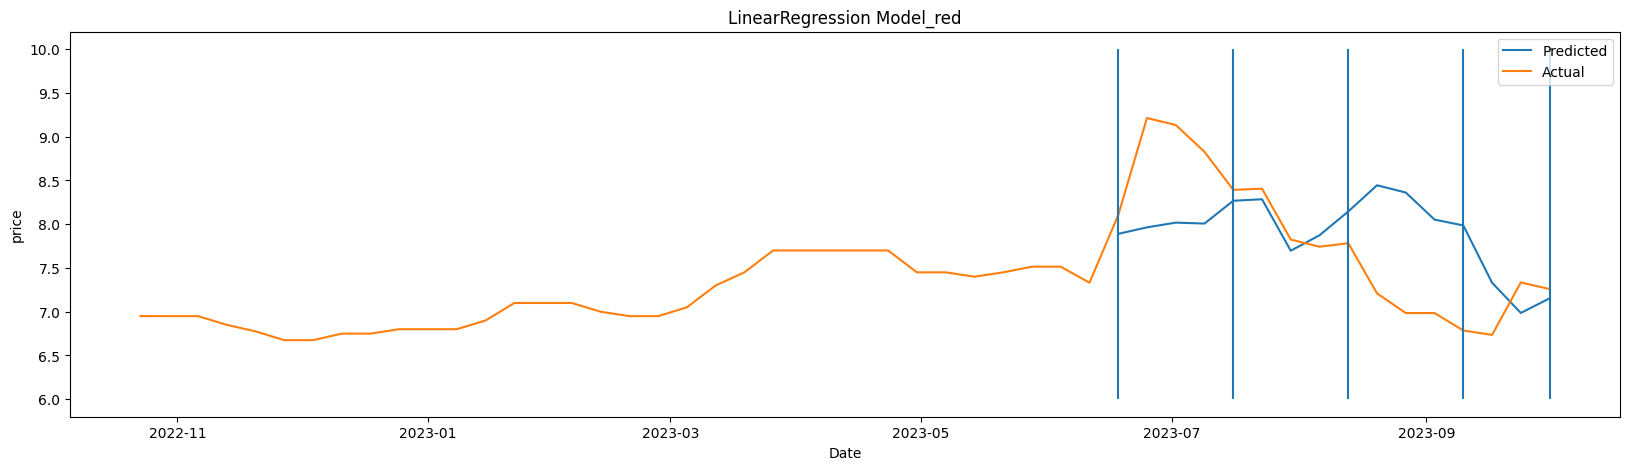

In [62]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=10

# Plot the first DataFrame
plt.plot(outcome_red_all.index, outcome_red_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_red.index, actual_df_red, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('LinearRegression Model_red')
plt.legend()

# Show the plot
plt.show()

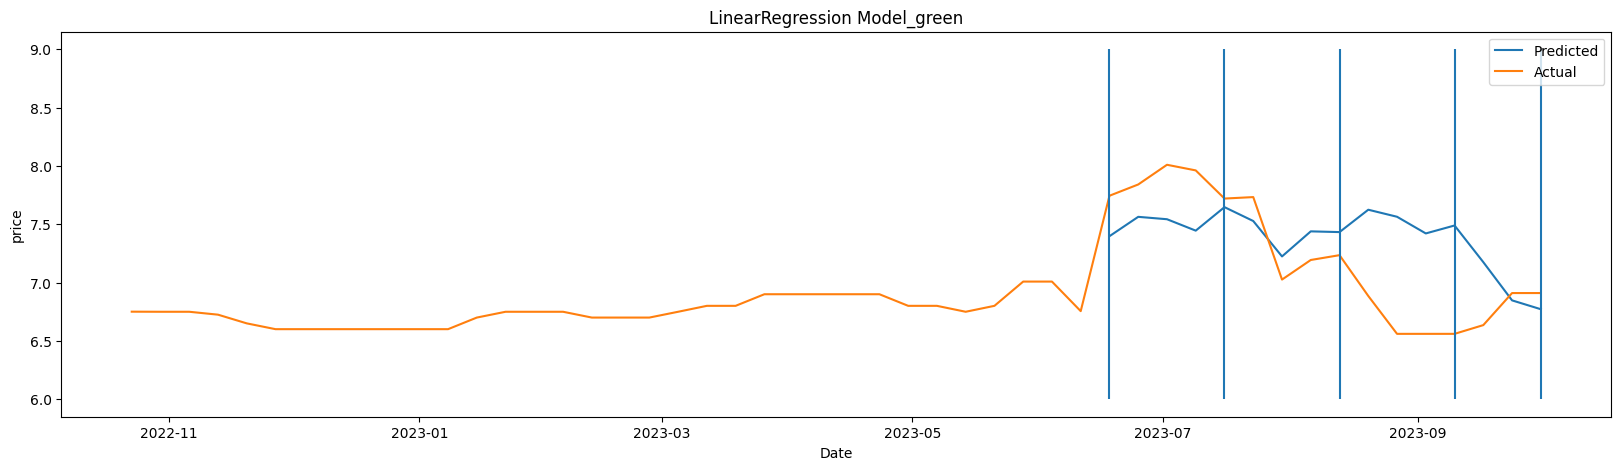

In [63]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=9

# Plot the first DataFrame
plt.plot(outcome_green_all.index, outcome_green_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_green.index, actual_df_green, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('LinearRegression Model_green')
plt.legend()

# Show the plot
plt.show()

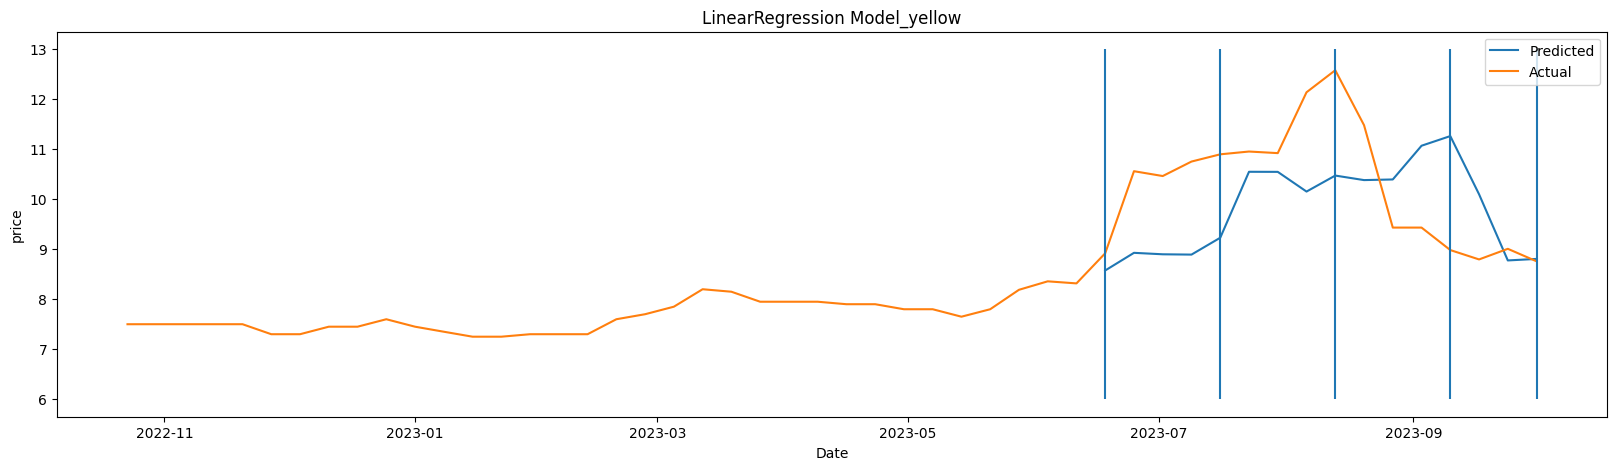

In [64]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=13

# Plot the first DataFrame
plt.plot(outcome_yellow_all.index, outcome_yellow_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_yellow.index, actual_df_yellow, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('LinearRegression Model_yellow')
plt.legend()

# Show the plot
plt.show()

##5) XGBRegressor

In [65]:
XGBRegressor_model_red=model_data_red[model_data_red['model_name']== 'XGBRegressor']
XGBRegressor_model_red = XGBRegressor_model_red.explode(['week_end_dt','y_test', 'y_pred_red'])
XGBRegressor_model_red['week_end_dt']= pd.to_datetime(XGBRegressor_model_red['week_end_dt'])

XGBRegressor_model_red
XGBRegressor_model_red['mae'].mean()

0.6305496398929301

In [66]:
XGBRegressor_model_green=model_data_green[model_data_green['model_name']== 'XGBRegressor']
XGBRegressor_model_green = XGBRegressor_model_green.explode(['week_end_dt','y_test', 'y_pred_green'])
XGBRegressor_model_green['week_end_dt']= pd.to_datetime(XGBRegressor_model_green['week_end_dt'])

XGBRegressor_model_green
XGBRegressor_model_green['mae'].mean()

0.5478369400799091

In [67]:
XGBRegressor_model_yellow=model_data_yellow[model_data_yellow['model_name']== 'XGBRegressor']
XGBRegressor_model_yellow = XGBRegressor_model_yellow.explode(['week_end_dt','y_test', 'y_pred_yellow'])
XGBRegressor_model_yellow['week_end_dt']= pd.to_datetime(XGBRegressor_model_yellow['week_end_dt'])

XGBRegressor_model_yellow
XGBRegressor_model_yellow['mae'].mean()

1.4352417926564145

In [68]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_XGBRegressor_red= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(XGBRegressor_model_red[XGBRegressor_model_red['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_red':'mean'}))
 df_XGBRegressor_red=pd.concat([df_XGBRegressor_red, df], axis=0)

df_XGBRegressor_red.reset_index(inplace=True)


In [69]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_XGBRegressor_green= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(XGBRegressor_model_green[XGBRegressor_model_green['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_green':'mean'}))
 df_XGBRegressor_green=pd.concat([df_XGBRegressor_green, df], axis=0)

df_XGBRegressor_green.reset_index(inplace=True)

In [70]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_XGBRegressor_yellow= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(XGBRegressor_model_yellow[XGBRegressor_model_yellow['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_yellow':'mean'}))
 df_XGBRegressor_yellow=pd.concat([df_XGBRegressor_yellow, df], axis=0)

df_XGBRegressor_yellow.reset_index(inplace=True)

In [71]:
outcome_red=df_XGBRegressor_red['y_pred_red']
outcome_green=df_XGBRegressor_green['y_pred_green']
outcome_yellow=df_XGBRegressor_yellow['y_pred_yellow']

In [72]:
new_date_index=pd.date_range(start="2023-06-18",end="2023-10-01",freq="W")
new_date_index=pd.DataFrame({"date":new_date_index})

outcome_red_all=pd.concat([outcome_red,new_date_index],axis=1)
outcome_red_all['date']= pd.to_datetime(outcome_red_all['date'])
outcome_red_all.set_index('date', inplace= True)

outcome_green_all=pd.concat([outcome_green,new_date_index],axis=1)
outcome_green_all['date']= pd.to_datetime(outcome_green_all['date'])
outcome_green_all.set_index('date', inplace= True)

outcome_yellow_all=pd.concat([outcome_yellow,new_date_index],axis=1)
outcome_yellow_all['date']= pd.to_datetime(outcome_yellow_all['date'])
outcome_yellow_all.set_index('date', inplace= True)

In [73]:
actual_df_red=df_red_12feat['price'][-50:]
actual_df_red.reset_index()
actual_df_red.index=pd.to_datetime(actual_df_red.index)

actual_df_green=df_green_12feat['price'][-50:]
actual_df_green.reset_index()
actual_df_green.index=pd.to_datetime(actual_df_green.index)

actual_df_yellow=df_yellow_12feat['price'][-50:]
actual_df_yellow.reset_index()
actual_df_yellow.index=pd.to_datetime(actual_df_yellow.index)

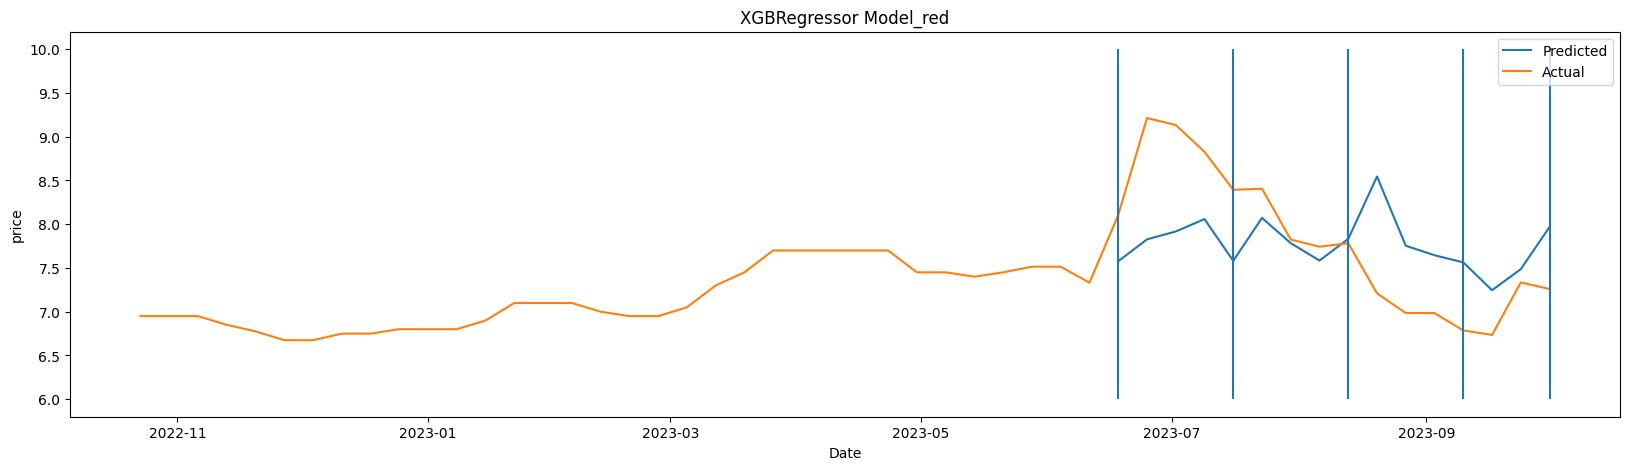

In [74]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=10

# Plot the first DataFrame
plt.plot(outcome_red_all.index, outcome_red_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_red.index, actual_df_red, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('XGBRegressor Model_red')
plt.legend()

# Show the plot
plt.show()

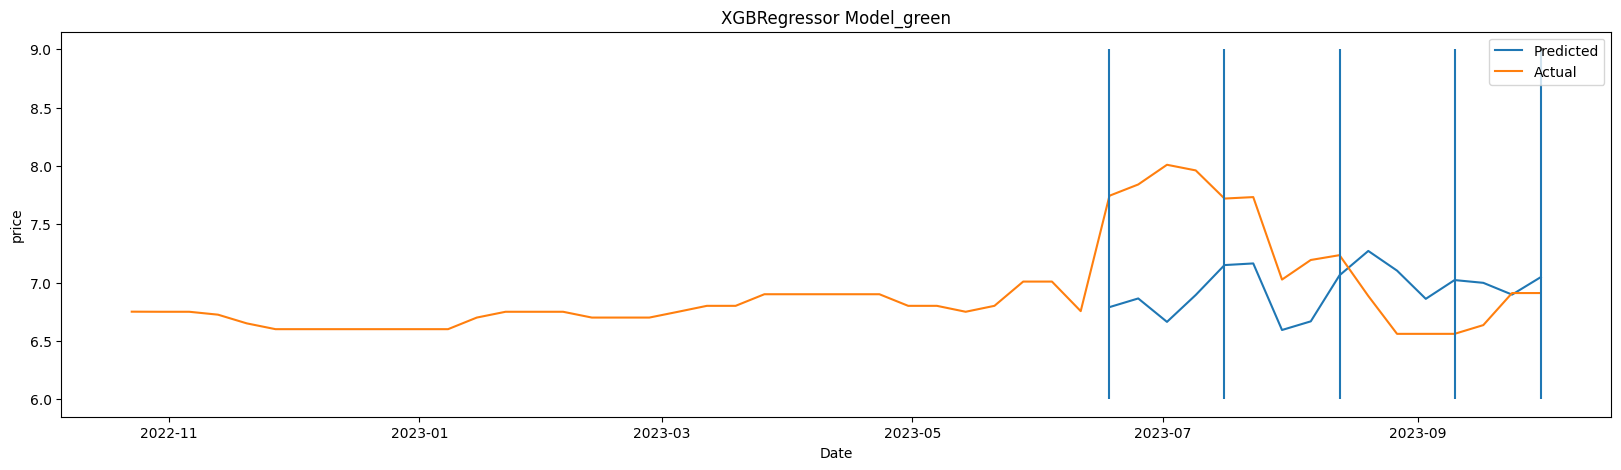

In [75]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=9

# Plot the first DataFrame
plt.plot(outcome_green_all.index, outcome_green_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_green.index, actual_df_green, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('XGBRegressor Model_green')
plt.legend()

# Show the plot
plt.show()

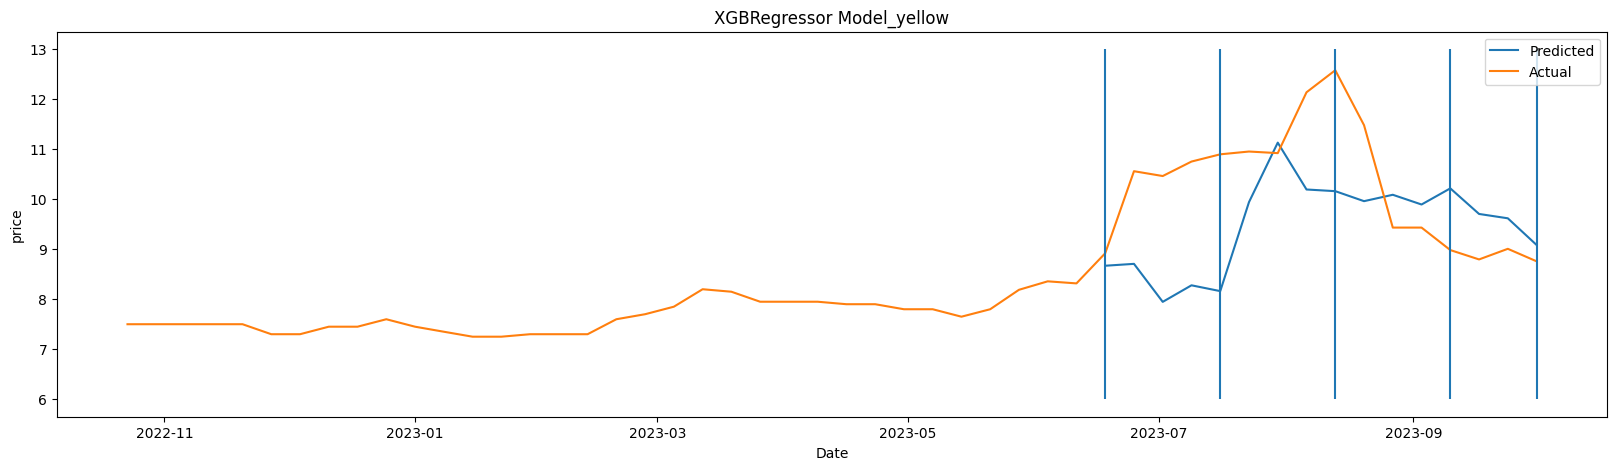

In [76]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=13

# Plot the first DataFrame
plt.plot(outcome_yellow_all.index, outcome_yellow_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_yellow.index, actual_df_yellow, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('XGBRegressor Model_yellow')
plt.legend()

# Show the plot
plt.show()

##6) XGBRFRegressor

In [77]:
XGBRFRegressor_model_red=model_data_red[model_data_red['model_name']== 'XGBRFRegressor']
XGBRFRegressor_model_red = XGBRFRegressor_model_red.explode(['week_end_dt','y_test', 'y_pred_red'])
XGBRFRegressor_model_red['week_end_dt']= pd.to_datetime(XGBRFRegressor_model_red['week_end_dt'])

XGBRFRegressor_model_red
XGBRFRegressor_model_red['mae'].mean()

0.7142250286568272

In [78]:
XGBRFRegressor_model_green=model_data_green[model_data_green['model_name']== 'XGBRFRegressor']
XGBRFRegressor_model_green = XGBRFRegressor_model_green.explode(['week_end_dt','y_test', 'y_pred_green'])
XGBRFRegressor_model_green['week_end_dt']= pd.to_datetime(XGBRFRegressor_model_green['week_end_dt'])

XGBRFRegressor_model_green
XGBRFRegressor_model_green['mae'].mean()

0.5507074423936111

In [79]:
XGBRFRegressor_model_yellow=model_data_yellow[model_data_yellow['model_name']== 'XGBRFRegressor']
XGBRFRegressor_model_yellow = XGBRFRegressor_model_yellow.explode(['week_end_dt','y_test', 'y_pred_yellow'])
XGBRFRegressor_model_yellow['week_end_dt']= pd.to_datetime(XGBRFRegressor_model_yellow['week_end_dt'])

XGBRFRegressor_model_yellow
XGBRFRegressor_model_yellow['mae'].mean()

1.3405075278217025

In [80]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_XGBFRegressor_red= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(XGBRFRegressor_model_red[XGBRFRegressor_model_red['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_red':'mean'}))
 df_XGBFRegressor_red=pd.concat([df_XGBFRegressor_red, df], axis=0)

df_XGBFRegressor_red.reset_index(inplace=True)


In [81]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_XGBFRegressor_green= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(XGBRFRegressor_model_green[XGBRFRegressor_model_green['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_green':'mean'}))
 df_XGBFRegressor_green=pd.concat([df_XGBFRegressor_green, df], axis=0)

df_XGBFRegressor_green.reset_index(inplace=True)

In [82]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_XGBFRegressor_yellow= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(XGBRFRegressor_model_yellow[XGBRFRegressor_model_yellow['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_yellow':'mean'}))
 df_XGBFRegressor_yellow=pd.concat([df_XGBFRegressor_yellow, df], axis=0)

df_XGBFRegressor_yellow.reset_index(inplace=True)

In [83]:
outcome_red=df_XGBFRegressor_red['y_pred_red']
outcome_green=df_XGBFRegressor_green['y_pred_green']
outcome_yellow=df_XGBFRegressor_yellow['y_pred_yellow']

In [84]:
new_date_index=pd.date_range(start="2023-06-18",end="2023-10-01",freq="W")
new_date_index=pd.DataFrame({"date":new_date_index})

outcome_red_all=pd.concat([outcome_red,new_date_index],axis=1)
outcome_red_all['date']= pd.to_datetime(outcome_red_all['date'])
outcome_red_all.set_index('date', inplace= True)

outcome_green_all=pd.concat([outcome_green,new_date_index],axis=1)
outcome_green_all['date']= pd.to_datetime(outcome_green_all['date'])
outcome_green_all.set_index('date', inplace= True)

outcome_yellow_all=pd.concat([outcome_yellow,new_date_index],axis=1)
outcome_yellow_all['date']= pd.to_datetime(outcome_yellow_all['date'])
outcome_yellow_all.set_index('date', inplace= True)

In [85]:
actual_df_red=df_red_12feat['price'][-50:]
actual_df_red.reset_index()
actual_df_red.index=pd.to_datetime(actual_df_red.index)

actual_df_green =df_green_12feat['price'][-50:]
actual_df_green.reset_index()
actual_df_green.index=pd.to_datetime(actual_df_green.index)

actual_df_yellow=df_yellow_12feat['price'][-50:]
actual_df_yellow.reset_index()
actual_df_yellow.index=pd.to_datetime(actual_df_yellow.index)

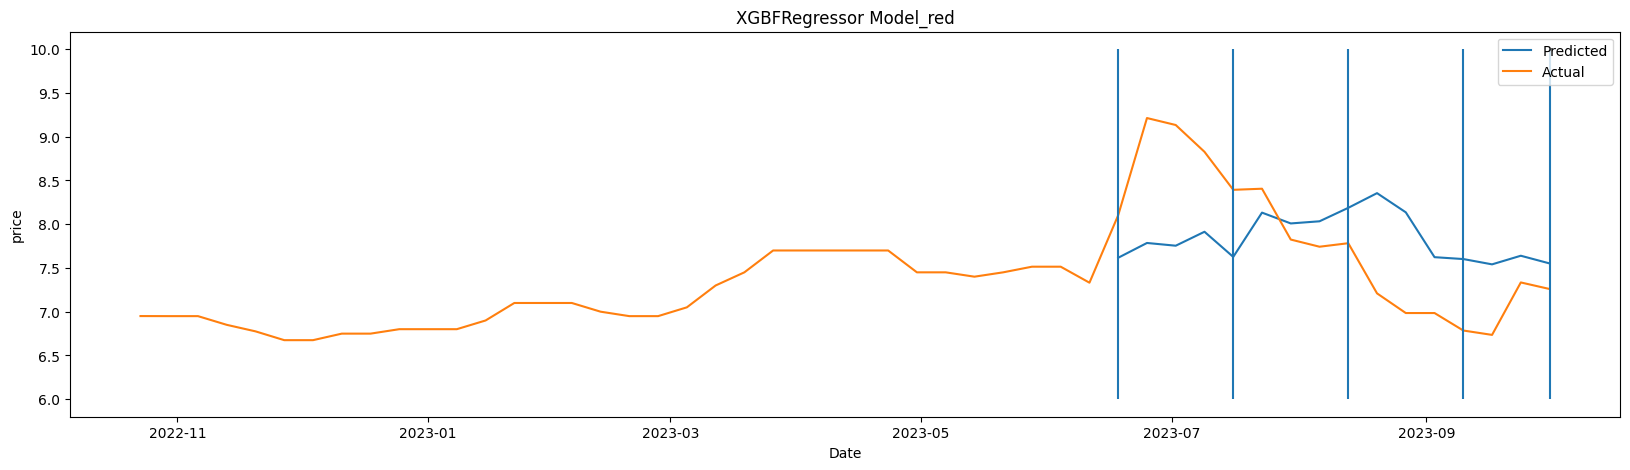

In [86]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=10

# Plot the first DataFrame
plt.plot(outcome_red_all.index, outcome_red_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_red.index, actual_df_red, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('XGBFRegressor Model_red')
plt.legend()

# Show the plot
plt.show()

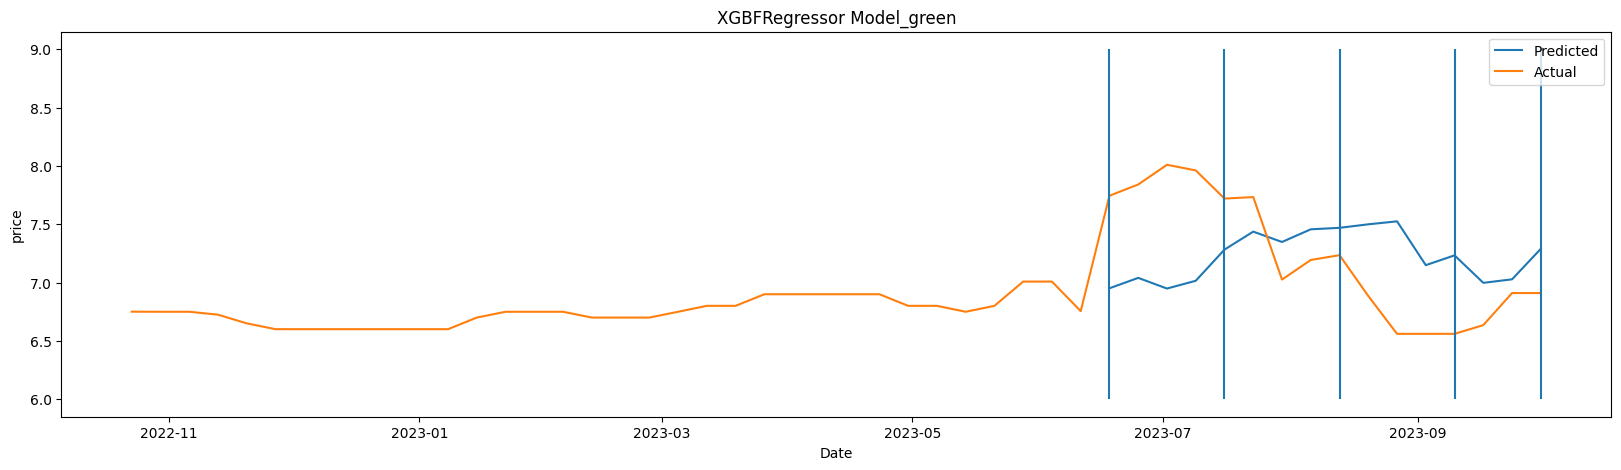

In [87]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=9

# Plot the first DataFrame
plt.plot(outcome_green_all.index, outcome_green_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_green.index, actual_df_green, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('XGBFRegressor Model_green')
plt.legend()

# Show the plot
plt.show()

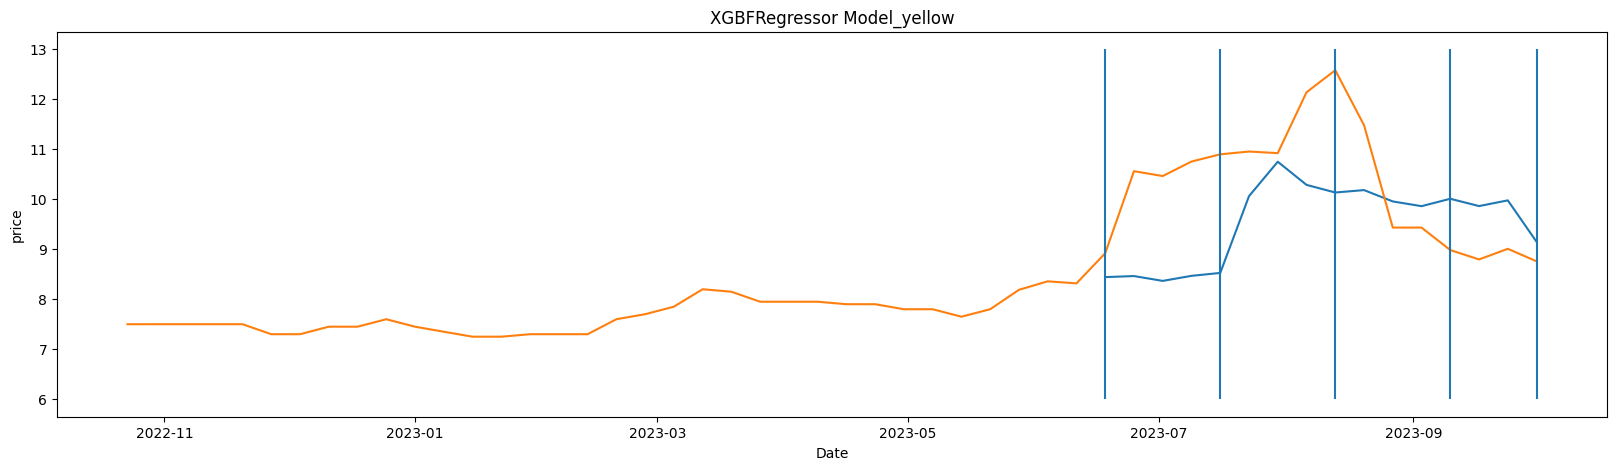

In [88]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=13

# Plot the first DataFrame
plt.plot(outcome_yellow_all.index, outcome_yellow_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_yellow.index, actual_df_yellow, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('XGBFRegressor Model_yellow')

# Show the plot
plt.show()

##7) AdaBoostRegressor

In [89]:
AdaBoostRegressor_model_red=model_data_red[model_data_red['model_name']== 'AdaBoostRegressor']
AdaBoostRegressor_model_red = AdaBoostRegressor_model_red.explode(['week_end_dt','y_test', 'y_pred_red'])
AdaBoostRegressor_model_red['week_end_dt']= pd.to_datetime(AdaBoostRegressor_model_red['week_end_dt'])

AdaBoostRegressor_model_red
AdaBoostRegressor_model_red['mae'].mean()

0.8247146837974229

In [90]:
AdaBoostRegressor_model_green=model_data_green[model_data_green['model_name']== 'AdaBoostRegressor']
AdaBoostRegressor_model_green = AdaBoostRegressor_model_green.explode(['week_end_dt','y_test', 'y_pred_green'])
AdaBoostRegressor_model_green['week_end_dt']= pd.to_datetime(AdaBoostRegressor_model_green['week_end_dt'])

AdaBoostRegressor_model_green
AdaBoostRegressor_model_green['mae'].mean()

0.6855830929800716

In [91]:
AdaBoostRegressor_model_yellow=model_data_yellow[model_data_yellow['model_name']== 'AdaBoostRegressor']
AdaBoostRegressor_model_yellow = AdaBoostRegressor_model_yellow.explode(['week_end_dt','y_test', 'y_pred_yellow'])
AdaBoostRegressor_model_yellow['week_end_dt']= pd.to_datetime(AdaBoostRegressor_model_yellow['week_end_dt'])

AdaBoostRegressor_model_yellow
AdaBoostRegressor_model_yellow['mae'].mean()

1.353723008740388

In [92]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_AdaBoostRegressor_red= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(AdaBoostRegressor_model_red[AdaBoostRegressor_model_red['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_red':'mean'}))
 df_AdaBoostRegressor_red=pd.concat([df_AdaBoostRegressor_red, df], axis=0)

df_AdaBoostRegressor_red.reset_index(inplace=True)


In [93]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_AdaBoostRegressor_green= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(AdaBoostRegressor_model_green[AdaBoostRegressor_model_green['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_green':'mean'}))
 df_AdaBoostRegressor_green=pd.concat([df_AdaBoostRegressor_green, df], axis=0)

df_AdaBoostRegressor_green.reset_index(inplace=True)

In [94]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_AdaBoostRegressor_yellow= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(AdaBoostRegressor_model_yellow[AdaBoostRegressor_model_yellow['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_yellow':'mean'}))
 df_AdaBoostRegressor_yellow=pd.concat([df_AdaBoostRegressor_yellow, df], axis=0)

df_AdaBoostRegressor_yellow.reset_index(inplace=True)

In [95]:
outcome_red=df_AdaBoostRegressor_red['y_pred_red']
outcome_green=df_AdaBoostRegressor_green['y_pred_green']
outcome_yellow=df_AdaBoostRegressor_yellow['y_pred_yellow']

In [96]:
new_date_index=pd.date_range(start="2023-06-18",end="2023-10-01",freq="W")
new_date_index=pd.DataFrame({"date":new_date_index})

outcome_red_all=pd.concat([outcome_red,new_date_index],axis=1)
outcome_red_all['date']= pd.to_datetime(outcome_red_all['date'])
outcome_red_all.set_index('date', inplace= True)

outcome_green_all=pd.concat([outcome_green,new_date_index],axis=1)
outcome_green_all['date']= pd.to_datetime(outcome_green_all['date'])
outcome_green_all.set_index('date', inplace= True)

outcome_yellow_all=pd.concat([outcome_yellow,new_date_index],axis=1)
outcome_yellow_all['date']= pd.to_datetime(outcome_yellow_all['date'])
outcome_yellow_all.set_index('date', inplace= True)

In [97]:
actual_df_red=df_red_12feat['price'][-50:]
actual_df_red.reset_index()
actual_df_red.index=pd.to_datetime(actual_df_red.index)

actual_df_green=df_green_12feat['price'][-50:]
actual_df_green.reset_index()
actual_df_green.index=pd.to_datetime(actual_df_green.index)

actual_df_yellow=df_yellow_12feat['price'][-50:]
actual_df_yellow.reset_index()
actual_df_yellow.index=pd.to_datetime(actual_df_yellow.index)

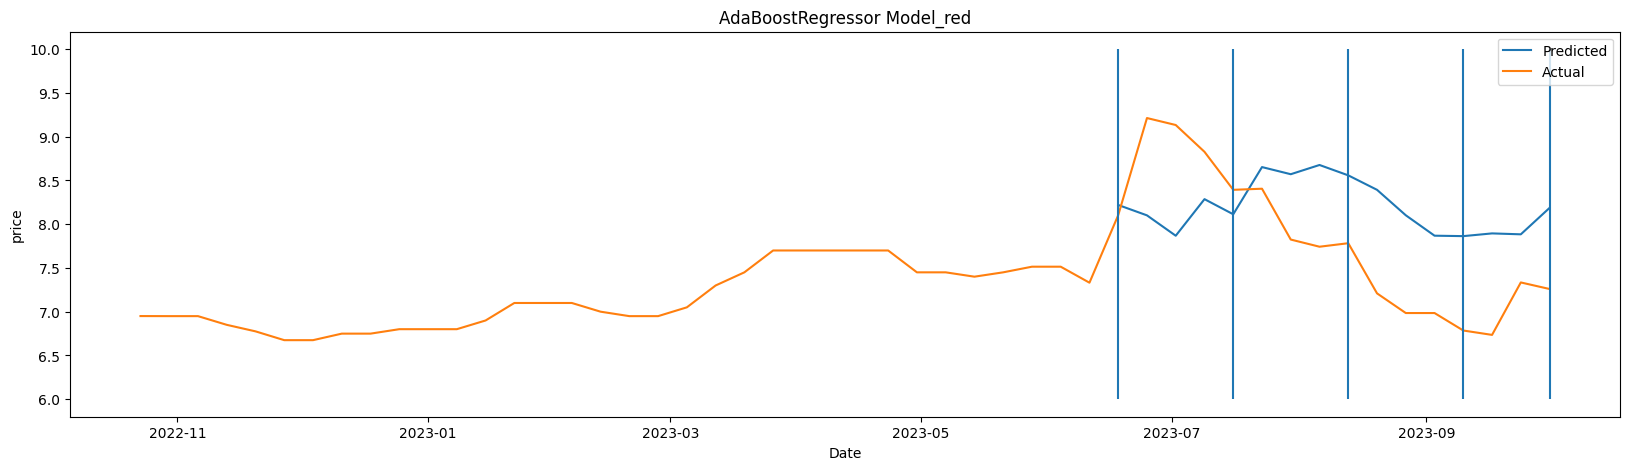

In [98]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=10

# Plot the first DataFrame
plt.plot(outcome_red_all.index, outcome_red_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_red.index, actual_df_red, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('AdaBoostRegressor Model_red')
plt.legend()

# Show the plot
plt.show()

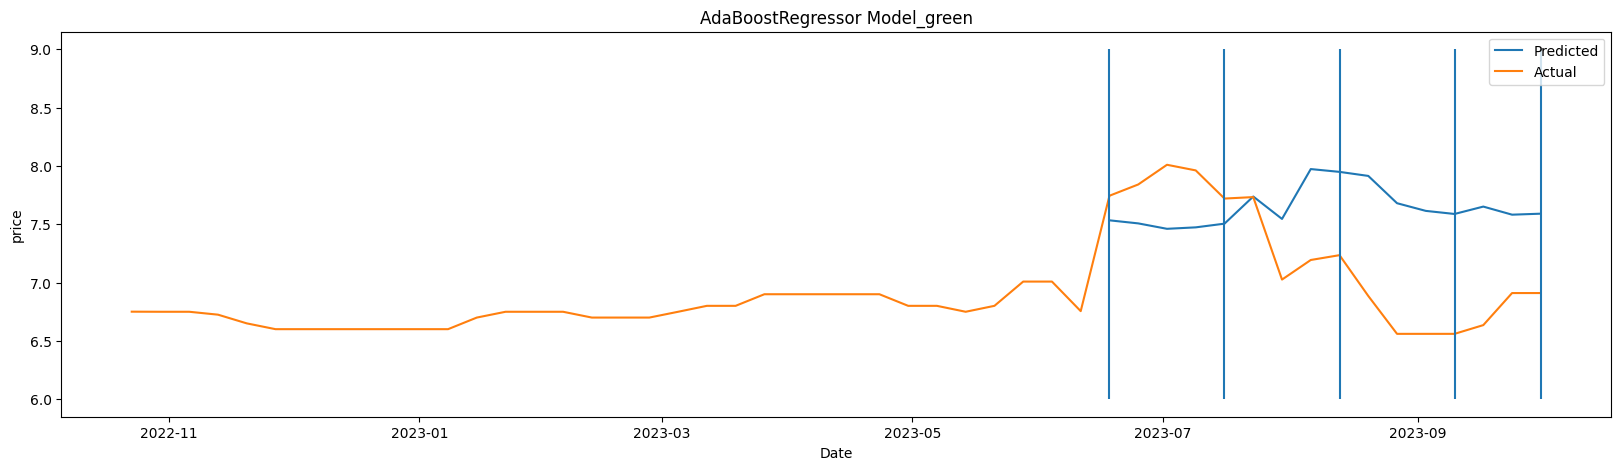

In [99]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=9

# Plot the first DataFrame
plt.plot(outcome_green_all.index, outcome_green_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_green.index, actual_df_green, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('AdaBoostRegressor Model_green')
plt.legend()

# Show the plot
plt.show()

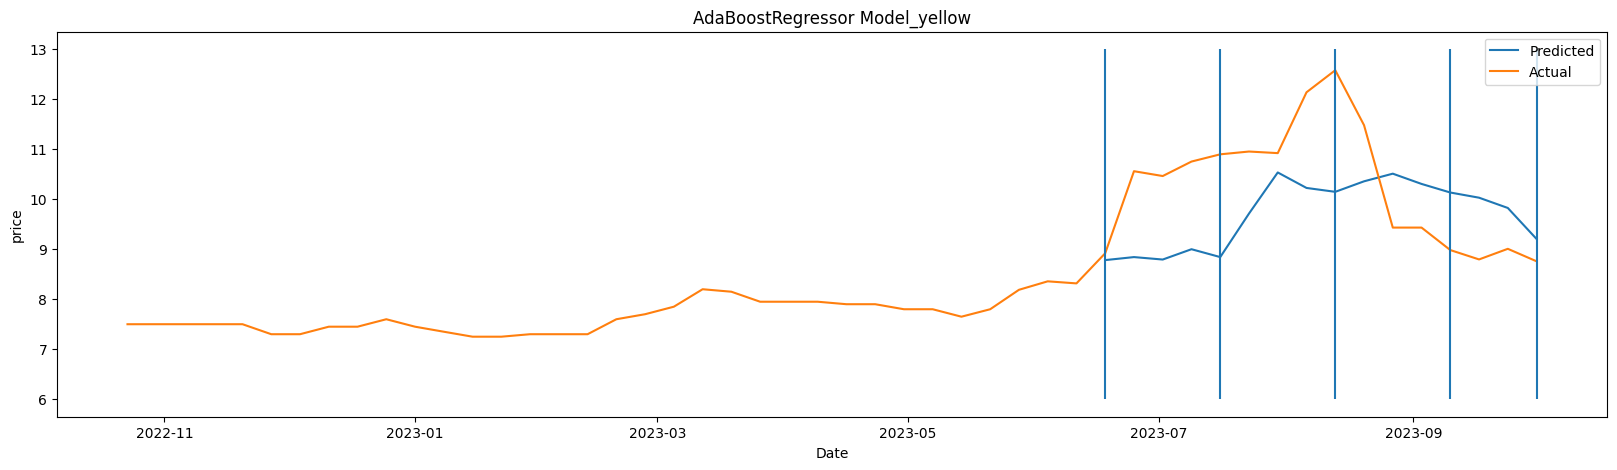

In [100]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=13

# Plot the first DataFrame
plt.plot(outcome_yellow_all.index, outcome_yellow_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_yellow.index, actual_df_yellow, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('AdaBoostRegressor Model_yellow')
plt.legend()

# Show the plot
plt.show()

##8) LGBMRegressor

In [101]:
LGBMRegressor_model_red=model_data_red[model_data_red['model_name']== 'LGBMRegressor']
LGBMRegressor_model_red = LGBMRegressor_model_red.explode(['week_end_dt','y_test', 'y_pred_red'])
LGBMRegressor_model_red['week_end_dt']= pd.to_datetime(LGBMRegressor_model_red['week_end_dt'])

LGBMRegressor_model_red
LGBMRegressor_model_red['mae'].mean()

0.6556157592479964

In [102]:
LGBMRegressor_model_green=model_data_green[model_data_green['model_name']== 'LGBMRegressor']
LGBMRegressor_model_green = LGBMRegressor_model_green.explode(['week_end_dt','y_test', 'y_pred_green'])
LGBMRegressor_model_green['week_end_dt']= pd.to_datetime(LGBMRegressor_model_green['week_end_dt'])

LGBMRegressor_model_green
LGBMRegressor_model_green['mae'].mean()

0.46594652610607856

In [103]:
LGBMRegressor_model_yellow=model_data_yellow[model_data_yellow['model_name']== 'LGBMRegressor']
LGBMRegressor_model_yellow = LGBMRegressor_model_yellow.explode(['week_end_dt','y_test', 'y_pred_yellow'])
LGBMRegressor_model_yellow['week_end_dt']= pd.to_datetime(LGBMRegressor_model_yellow['week_end_dt'])

LGBMRegressor_model_yellow
LGBMRegressor_model_yellow['mae'].mean()

1.2975941408184153

In [104]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_LGBMRegressor_red= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(LGBMRegressor_model_red[LGBMRegressor_model_red['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_red':'mean'}))
 df_LGBMRegressor_red=pd.concat([df_LGBMRegressor_red, df], axis=0)

df_LGBMRegressor_red.reset_index(inplace=True)


In [105]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_LGBMRegressor_green= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(LGBMRegressor_model_green[LGBMRegressor_model_green['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_green':'mean'}))
 df_LGBMRegressor_green=pd.concat([df_LGBMRegressor_green, df], axis=0)

df_LGBMRegressor_green.reset_index(inplace=True)

In [106]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_LGBMRegressor_yellow= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(LGBMRegressor_model_yellow[LGBMRegressor_model_yellow['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_yellow':'mean'}))
 df_LGBMRegressor_yellow=pd.concat([df_LGBMRegressor_yellow, df], axis=0)

df_LGBMRegressor_yellow.reset_index(inplace=True)

In [107]:
outcome_red=df_LGBMRegressor_red['y_pred_red']
outcome_green=df_LGBMRegressor_green['y_pred_green']
outcome_yellow=df_LGBMRegressor_yellow['y_pred_yellow']

In [108]:
new_date_index=pd.date_range(start="2023-06-18",end="2023-10-01",freq="W")
new_date_index=pd.DataFrame({"date":new_date_index})

outcome_red_all=pd.concat([outcome_red,new_date_index],axis=1)
outcome_red_all['date']= pd.to_datetime(outcome_red_all['date'])
outcome_red_all.set_index('date', inplace= True)

outcome_green_all=pd.concat([outcome_green,new_date_index],axis=1)
outcome_green_all['date']= pd.to_datetime(outcome_green_all['date'])
outcome_green_all.set_index('date', inplace= True)

outcome_yellow_all=pd.concat([outcome_yellow,new_date_index],axis=1)
outcome_yellow_all['date']= pd.to_datetime(outcome_yellow_all['date'])
outcome_yellow_all.set_index('date', inplace= True)

In [109]:
actual_df_red=df_red_12feat['price'][-50:]
actual_df_red.reset_index()
actual_df_red.index=pd.to_datetime(actual_df_red.index)

actual_df_green=df_green_12feat['price'][-50:]
actual_df_green.reset_index()
actual_df_green.index=pd.to_datetime(actual_df_green.index)

actual_df_yellow=df_yellow_12feat['price'][-50:]
actual_df_yellow.reset_index()
actual_df_yellow.index=pd.to_datetime(actual_df_yellow.index)

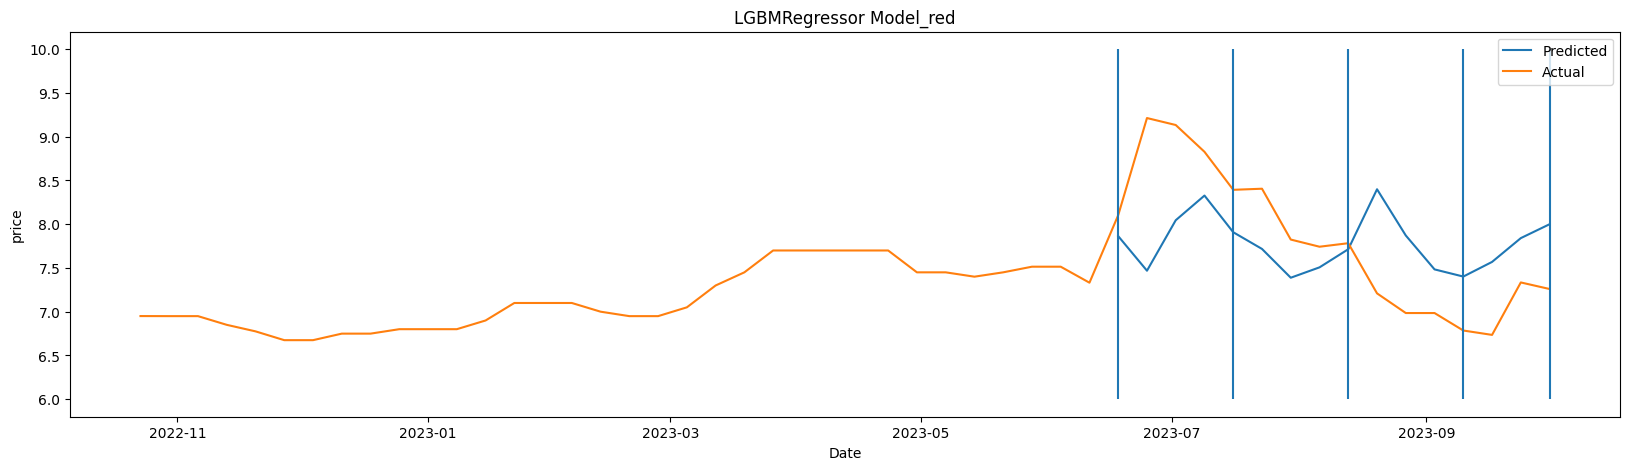

In [110]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=10

# Plot the first DataFrame
plt.plot(outcome_red_all.index, outcome_red_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_red.index, actual_df_red, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('LGBMRegressor Model_red')
plt.legend()

# Show the plot
plt.show()

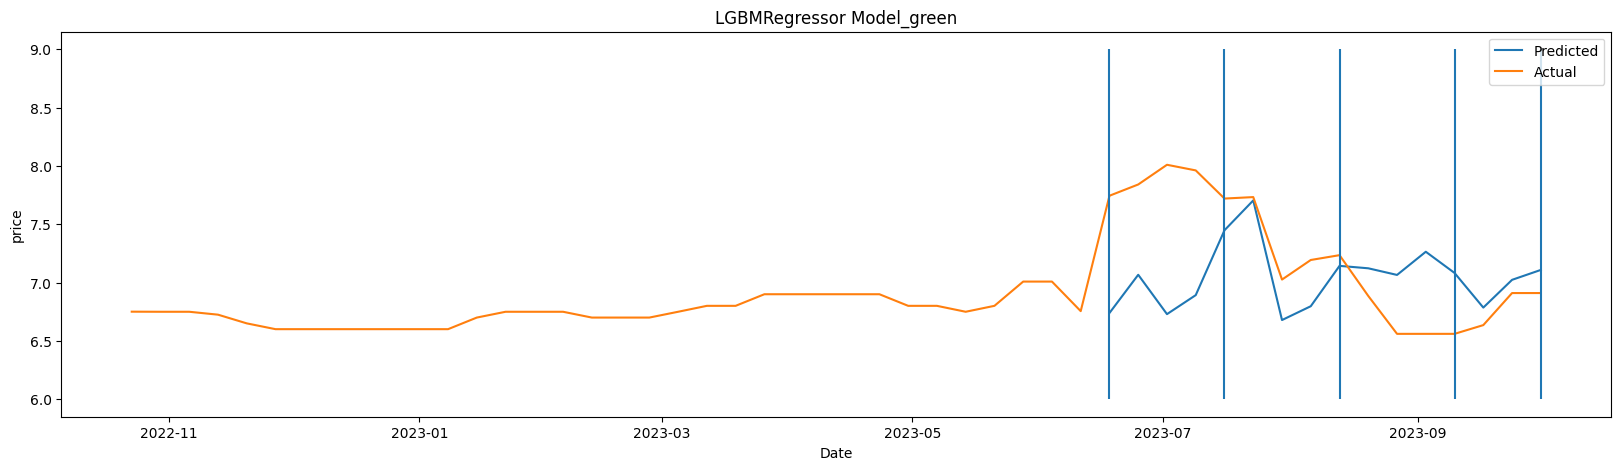

In [111]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=9

# Plot the first DataFrame
plt.plot(outcome_green_all.index, outcome_green_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_green.index, actual_df_green, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('LGBMRegressor Model_green')
plt.legend()

# Show the plot
plt.show()

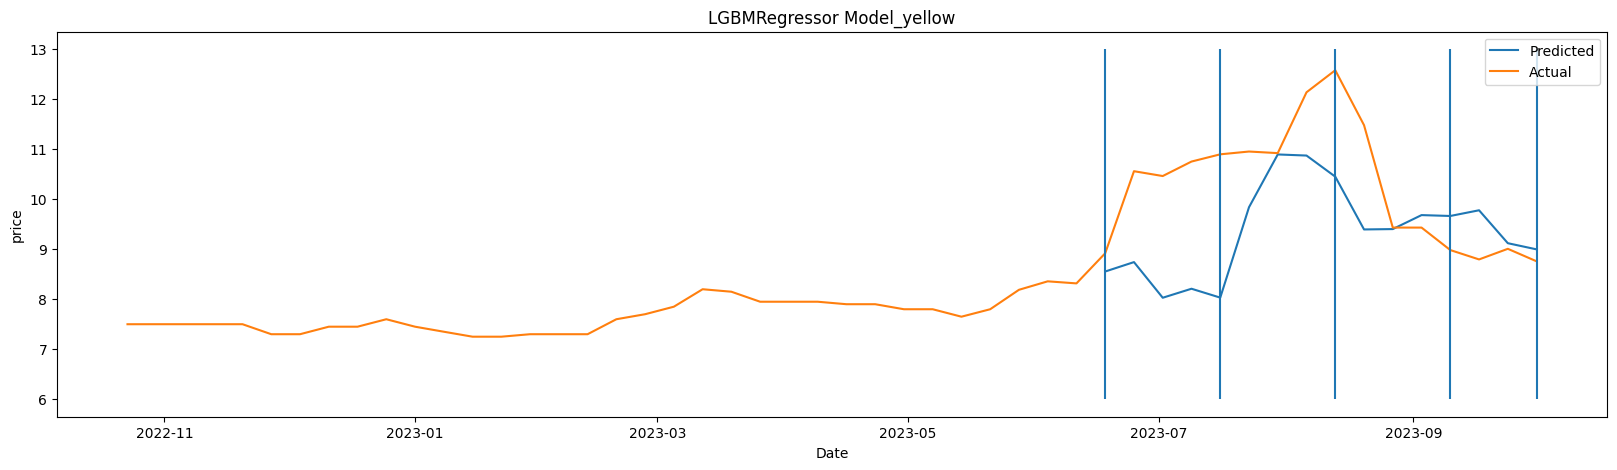

In [112]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=13

# Plot the first DataFrame
plt.plot(outcome_yellow_all.index, outcome_yellow_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_yellow.index, actual_df_yellow, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('LGBMRegressor Model_yellow')
plt.legend()

# Show the plot
plt.show()

##9) CatBoostRegressor

In [113]:
CatBoostRegressor_model_red=model_data_red[model_data_red['model_name']== 'CatBoostRegressor']
CatBoostRegressor_model_red = CatBoostRegressor_model_red.explode(['week_end_dt','y_test', 'y_pred_red'])
CatBoostRegressor_model_red['week_end_dt']= pd.to_datetime(CatBoostRegressor_model_red['week_end_dt'])

CatBoostRegressor_model_red
CatBoostRegressor_model_red['mae'].mean()

0.6439100284556869

In [114]:
CatBoostRegressor_model_green=model_data_green[model_data_green['model_name']== 'CatBoostRegressor']
CatBoostRegressor_model_green = CatBoostRegressor_model_green.explode(['week_end_dt','y_test', 'y_pred_green'])
CatBoostRegressor_model_green['week_end_dt']= pd.to_datetime(CatBoostRegressor_model_green['week_end_dt'])

CatBoostRegressor_model_green
CatBoostRegressor_model_green['mae'].mean()

0.4438237960781416

In [115]:
CatBoostRegressor_model_yellow=model_data_yellow[model_data_yellow['model_name']== 'CatBoostRegressor']
CatBoostRegressor_model_yellow = CatBoostRegressor_model_yellow.explode(['week_end_dt','y_test', 'y_pred_yellow'])
CatBoostRegressor_model_yellow['week_end_dt']= pd.to_datetime(CatBoostRegressor_model_yellow['week_end_dt'])

CatBoostRegressor_model_yellow
CatBoostRegressor_model_yellow['mae'].mean()

1.329159205462557

In [116]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_CatBoostRegressor_red= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(CatBoostRegressor_model_red[CatBoostRegressor_model_red['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_red':'mean'}))
 df_CatBoostRegressor_red=pd.concat([df_CatBoostRegressor_red, df], axis=0)

df_CatBoostRegressor_red.reset_index(inplace=True)


In [117]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_CatBoostRegressor_green= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(CatBoostRegressor_model_green[CatBoostRegressor_model_green['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_green':'mean'}))
 df_CatBoostRegressor_green=pd.concat([df_CatBoostRegressor_green, df], axis=0)

df_CatBoostRegressor_green.reset_index(inplace=True)

In [118]:
week_dt=['2023-06-18','2023-06-25', '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23', '2023-07-30',
         '2023-08-06', '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
         '2023-09-24', '2023-10-01']

df_CatBoostRegressor_yellow= pd.DataFrame()

for dt in week_dt:
 df=pd.DataFrame(CatBoostRegressor_model_yellow[CatBoostRegressor_model_yellow['week_end_dt']== dt].groupby(['week_end_dt','model_name']).agg({'mae':'mean', 'y_test':'mean', 'y_pred_yellow':'mean'}))
 df_CatBoostRegressor_yellow=pd.concat([df_CatBoostRegressor_yellow, df], axis=0)

df_CatBoostRegressor_yellow.reset_index(inplace=True)

In [119]:
outcome_red=df_CatBoostRegressor_red['y_pred_red']
outcome_green=df_CatBoostRegressor_green['y_pred_green']
outcome_yellow=df_CatBoostRegressor_yellow['y_pred_yellow']

In [120]:
new_date_index=pd.date_range(start="2023-06-18",end="2023-10-01",freq="W")
new_date_index=pd.DataFrame({"date":new_date_index})

outcome_red_all=pd.concat([outcome_red,new_date_index],axis=1)
outcome_red_all['date']= pd.to_datetime(outcome_red_all['date'])
outcome_red_all.set_index('date', inplace= True)

outcome_green_all=pd.concat([outcome_green,new_date_index],axis=1)
outcome_green_all['date']= pd.to_datetime(outcome_green_all['date'])
outcome_green_all.set_index('date', inplace= True)

outcome_yellow_all=pd.concat([outcome_yellow,new_date_index],axis=1)
outcome_yellow_all['date']= pd.to_datetime(outcome_yellow_all['date'])
outcome_yellow_all.set_index('date', inplace= True)

In [121]:
actual_df_red=df_red_12feat['price'][-50:]
actual_df_red.reset_index()
actual_df_red.index=pd.to_datetime(actual_df_red.index)

actual_df_green=df_green_12feat['price'][-50:]
actual_df_green.reset_index()
actual_df_green.index=pd.to_datetime(actual_df_green.index)

actual_df_yellow=df_yellow_12feat['price'][-50:]
actual_df_yellow.reset_index()
actual_df_yellow.index=pd.to_datetime(actual_df_yellow.index)

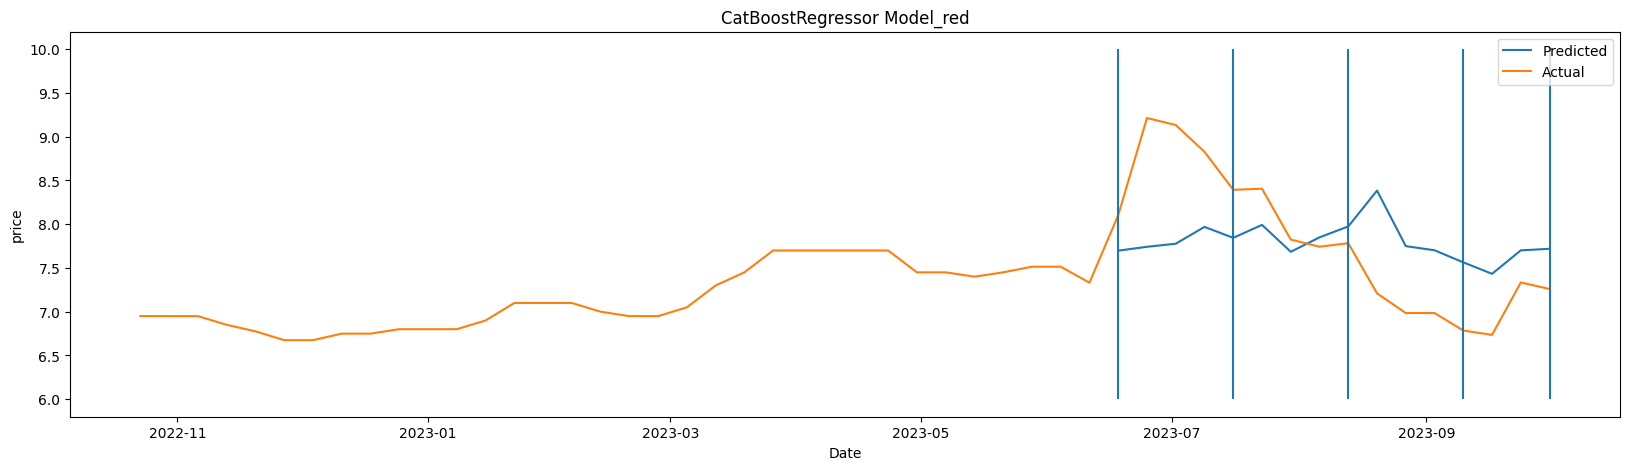

In [122]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=10

# Plot the first DataFrame
plt.plot(outcome_red_all.index, outcome_red_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_red.index, actual_df_red, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('CatBoostRegressor Model_red')
plt.legend()

# Show the plot
plt.show()

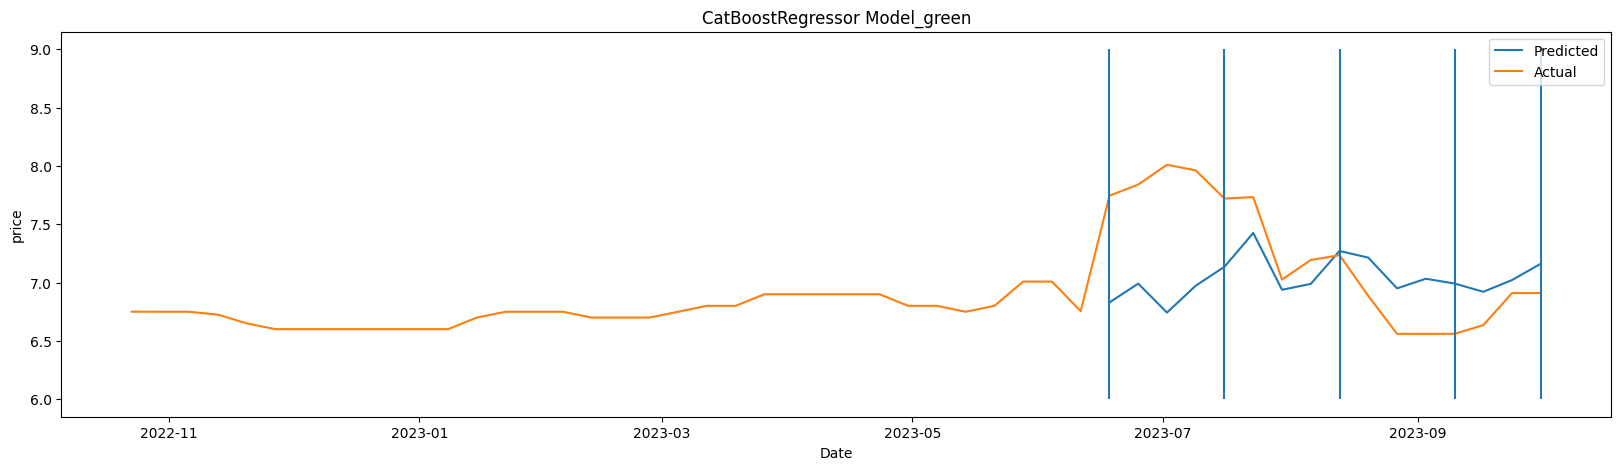

In [123]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=9

# Plot the first DataFrame
plt.plot(outcome_green_all.index, outcome_green_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_green.index, actual_df_green, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('CatBoostRegressor Model_green')
plt.legend()

# Show the plot
plt.show()

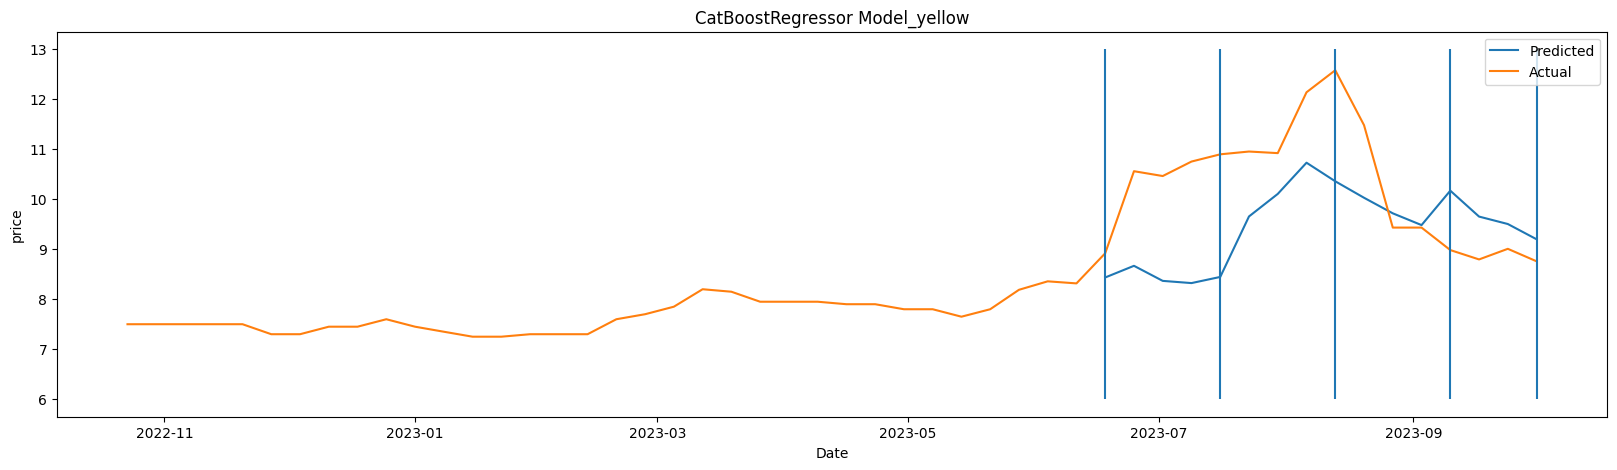

In [124]:
#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize = (20,5))
y_min=6
y_max=13

# Plot the first DataFrame
plt.plot(outcome_yellow_all.index, outcome_yellow_all, label='Predicted')

# Plot the second DataFrame
plt.plot(actual_df_yellow.index, actual_df_yellow, label='Actual')

ax.vlines(x=["2023-06-18","2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('price')
plt.title('CatBoostRegressor Model_yellow')
plt.legend()

# Show the plot
plt.show()